In [1]:
#importing library's for coding logistic regression
import pandas as pd
import numpy as np
import scipy.stats as s
import matplotlib.pyplot as plt

In [2]:
#uploading data file which biclass distribution of tumor
raw_data = pd.read_csv("tumor_data.csv")

In [3]:
#let's see how are data looks
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#number of rows
len(raw_data)

569

In [5]:
#extracting training and testing data from raw data 
#by applying rule of thumb i.e. training data = 70% raw data .
training_data_len = int(0.70 * len(raw_data))

In [6]:
training_data = raw_data.iloc[0:training_data_len,:]

In [7]:
testing_data = raw_data.iloc[training_data_len:,:]

In [8]:
training_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
#let's see our feature lables 
column_names = raw_data.columns

In [10]:
column_names

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
#lets drop id and Unnames: 32 column from are raw data as they are not important
training_data.drop([column_names[0],column_names[32]],axis=1,inplace=True)

C:\Users\Api\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
#droped column data
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
#converting it into data frame
training_data = pd.DataFrame(training_data)

In [14]:
#replacing class label B with 0 and M with 1
training_data['diagnosis'].replace(to_replace='B',value=0,inplace=True)

In [15]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
training_data['diagnosis'].replace(to_replace='M',value=1,inplace=True)

In [17]:
training_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
#now let's see our class label's
class_labels = training_data['diagnosis']

In [19]:
class_labels 

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
368    1
369    1
370    1
371    0
372    1
373    1
374    0
375    0
376    0
377    0
378    0
379    1
380    0
381    0
382    0
383    0
384    0
385    1
386    0
387    0
388    0
389    1
390    0
391    0
392    1
393    1
394    0
395    0
396    0
397    0
Name: diagnosis, Length: 398, dtype: int64

WE WILL BE USING SAME NOTATION AS WE HAVE USED WHILE SOLVING MATHEMATICALLY

In [20]:
#assigning it to C and making it an array

C = np.array(class_labels)

In [21]:
C.shape

(398,)

In [22]:
C= C.reshape(C.shape[0],1)

In [23]:
C.shape

(398, 1)

In [24]:
#now we will drop class label and assign it to pure_training data
pure_training_data = training_data.drop(['diagnosis'],axis=1,inplace=False)

In [25]:
pure_training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.080890,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.17910,0.5249,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.074000,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.14420,0.2576,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.059850,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.16540,0.3682,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.085430,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.18530,1.0580,1.10500,0.22100,0.4366,0.20750


In [26]:
N = pure_training_data.shape[0]

n = pure_training_data.shape[1]

In [27]:
N

398

In [28]:
n 

30

In [29]:
X = np.array(pure_training_data)

In [30]:
X = X/np.max(X,axis=0)

In [31]:
X

array([[0.63998577, 0.26425662, 0.65145889, ..., 0.91202749, 0.69313046,
        0.57301205],
       [0.73176805, 0.45239308, 0.70503979, ..., 0.63917526, 0.41428141,
        0.42901205],
       [0.70046247, 0.54098778, 0.68965517, ..., 0.83505155, 0.54429045,
        0.42207229],
       ...,
       [0.50017787, 0.43737271, 0.47612732, ..., 0.27185567, 0.38008436,
        0.31850602],
       [0.48061188, 0.48090631, 0.46737401, ..., 0.49931271, 0.401627  ,
        0.37040964],
       [0.45535397, 0.44450102, 0.44058355, ..., 0.28508591, 0.2994878 ,
        0.33990361]])

In [32]:
X1_transpose = X[0,:]

In [33]:
X1_transpose.shape

(30,)

In [34]:
theta0_initial = np.random.randn(1,1)

In [35]:
theta0_initial

array([[-1.43382613]])

In [36]:
theta_initial = np.random.randn(X.shape[1],1)

In [37]:
theta_initial

array([[ 0.83083435],
       [-1.8281509 ],
       [-0.36473505],
       [ 0.82044386],
       [-0.10315198],
       [ 0.87243285],
       [-1.23093683],
       [-0.02764958],
       [-0.23119833],
       [ 0.6848645 ],
       [-1.31930695],
       [ 1.53008712],
       [-0.18782005],
       [ 0.04477095],
       [-0.10831464],
       [-0.05330029],
       [-1.01912082],
       [ 1.33145775],
       [-0.56713939],
       [ 1.28065017],
       [-2.58937458],
       [-0.09840954],
       [-0.10944463],
       [ 0.98698994],
       [-1.28928179],
       [ 0.99949785],
       [ 0.01667931],
       [ 0.32008214],
       [ 0.14783   ],
       [-0.50730314]])

In [38]:
epsilon = 0.0001
alpha = 0.01

In [39]:
power = (theta0_initial + np.matmul(X,theta_initial))

In [40]:
power

array([[-2.92602331],
       [-3.06240067],
       [-3.17346242],
       [-2.81901085],
       [-3.11895728],
       [-2.87767788],
       [-3.34637863],
       [-2.88464351],
       [-3.0459443 ],
       [-2.47904297],
       [-3.19561044],
       [-2.78413745],
       [-1.61935802],
       [-3.12898468],
       [-2.46634992],
       [-3.3590474 ],
       [-3.27604151],
       [-3.27026441],
       [-3.55306733],
       [-2.88264729],
       [-2.69843889],
       [-2.49028815],
       [-2.51838376],
       [-3.5258574 ],
       [-3.85125242],
       [-2.94389824],
       [-2.63011879],
       [-3.12229608],
       [-3.36515152],
       [-2.84990323],
       [-3.62352586],
       [-2.99647565],
       [-3.75803949],
       [-3.43915788],
       [-2.90326317],
       [-3.37250752],
       [-3.12642944],
       [-2.41067335],
       [-2.99571757],
       [-2.99637292],
       [-3.09948989],
       [-3.17904457],
       [-2.91441939],
       [-3.14494343],
       [-3.23250437],
       [-3

In [41]:
H_theta0_theta = 1/(1+ np.exp(-power))

In [42]:
H_theta0_theta

array([[0.05088203],
       [0.04468511],
       [0.04017668],
       [0.05630547],
       [0.04233202],
       [0.05326812],
       [0.03401395],
       [0.05291793],
       [0.04539289],
       [0.07734047],
       [0.03933124],
       [0.0581874 ],
       [0.16529343],
       [0.04192737],
       [0.0782511 ],
       [0.03360014],
       [0.03640231],
       [0.0366055 ],
       [0.02783944],
       [0.05301807],
       [0.06306554],
       [0.07654183],
       [0.07457942],
       [0.0285854 ],
       [0.02081081],
       [0.05002569],
       [0.067225  ],
       [0.04219688],
       [0.0334025 ],
       [0.05468632],
       [0.02599465],
       [0.04758535],
       [0.02279758],
       [0.03109384],
       [0.05199249],
       [0.03316581],
       [0.04203014],
       [0.08236241],
       [0.04761971],
       [0.04759   ],
       [0.0431283 ],
       [0.03996197],
       [0.05144535],
       [0.04129098],
       [0.03796068],
       [0.03775671],
       [0.05539128],
       [0.044

In [43]:
temp = (H_theta0_theta - C)

In [44]:
temp 

array([[-0.94911797],
       [-0.95531489],
       [-0.95982332],
       [-0.94369453],
       [-0.95766798],
       [-0.94673188],
       [-0.96598605],
       [-0.94708207],
       [-0.95460711],
       [-0.92265953],
       [-0.96066876],
       [-0.9418126 ],
       [-0.83470657],
       [-0.95807263],
       [-0.9217489 ],
       [-0.96639986],
       [-0.96359769],
       [-0.9633945 ],
       [-0.97216056],
       [ 0.05301807],
       [ 0.06306554],
       [ 0.07654183],
       [-0.92542058],
       [-0.9714146 ],
       [-0.97918919],
       [-0.94997431],
       [-0.932775  ],
       [-0.95780312],
       [-0.9665975 ],
       [-0.94531368],
       [-0.97400535],
       [-0.95241465],
       [-0.97720242],
       [-0.96890616],
       [-0.94800751],
       [-0.96683419],
       [-0.95796986],
       [ 0.08236241],
       [-0.95238029],
       [-0.95241   ],
       [-0.9568717 ],
       [-0.96003803],
       [-0.94855465],
       [-0.95870902],
       [-0.96203932],
       [-0

In [45]:
temp.shape

(398, 1)

In [46]:
dels = np.matmul((X.T),temp)

In [47]:
dels

array([[ -95.92854263],
       [ -84.131129  ],
       [ -94.57273529],
       [ -61.05100454],
       [-109.06401862],
       [ -65.85948468],
       [ -59.20347415],
       [ -69.57986502],
       [ -97.4909022 ],
       [ -97.47946162],
       [ -33.20135347],
       [ -37.19101666],
       [ -30.79736739],
       [ -21.62166871],
       [ -32.77787076],
       [ -36.57757033],
       [ -15.96442745],
       [ -43.56514093],
       [ -40.02259382],
       [ -20.28545359],
       [ -99.51490901],
       [ -91.30842129],
       [ -96.12162332],
       [ -65.62522855],
       [-100.72025571],
       [ -56.35967136],
       [ -56.69763985],
       [ -99.61994495],
       [ -76.47924474],
       [ -67.90636331]])

In [48]:
dels.shape

(30, 1)

In [49]:
i = 0
alpha = 0.1
epsilon = 0.000001

neg_log_like_loss = []
iterations = []


while (True):
    
    power_initial = theta0_initial + np.matmul(X,theta_initial)
    H_theta0_theta_initial = 1/(1 + np.exp(-power_initial))
    temp = (H_theta0_theta_initial - C)
    dels = np.matmul(X.T,temp)/N
    
    #The code above is calculating the matix of derivatives wrt all thetas except theta0
    
    neg_log_like_initial = -(np.matmul(C.T,np.log(H_theta0_theta_initial)) + (np.matmul((1-C).T,np.log(1-H_theta0_theta_initial))))/N
    
    #The statement above is computing the value of Negative Log Likelhood function at initial values of Thetas
    
    theta0_final = theta0_initial - (alpha*(np.sum(temp))/N)
    theta_final = theta_initial - alpha*dels
    
    
    #The code above is updating the values of Thetas using Gradient Descent
    
    
    power_final = theta0_final + np.matmul(X,theta_final)
    H_theta0_theta_final = 1/(1 + np.exp(-power_final))
    neg_log_like_final = -(np.matmul(C.T,np.log(H_theta0_theta_final)) + (np.matmul((1-C).T,np.log(1-H_theta0_theta_final))))/N 
    
    #The code above is recomputing the value of Negative Log Likelihood Function at updated values of Thetas
    
    if abs(neg_log_like_initial - neg_log_like_final) < epsilon:
        
        break 
    
    
    theta0_initial = theta0_final
    theta_initial = theta_final
    
    i += 1
    
    iterations.append(i)
    neg_log_like_loss.append(neg_log_like_initial)
    
    print("The value of Negative Log Likelihood Function in iteration # {} is {}".format(i, neg_log_like_initial))

The value of Negative Log Likelihood Function in iteration # 1 is [[1.43345033]]
The value of Negative Log Likelihood Function in iteration # 2 is [[1.3246963]]
The value of Negative Log Likelihood Function in iteration # 3 is [[1.22255933]]
The value of Negative Log Likelihood Function in iteration # 4 is [[1.12804466]]
The value of Negative Log Likelihood Function in iteration # 5 is [[1.04204691]]
The value of Negative Log Likelihood Function in iteration # 6 is [[0.9652395]]
The value of Negative Log Likelihood Function in iteration # 7 is [[0.89797489]]
The value of Negative Log Likelihood Function in iteration # 8 is [[0.84022384]]
The value of Negative Log Likelihood Function in iteration # 9 is [[0.79157414]]
The value of Negative Log Likelihood Function in iteration # 10 is [[0.75129069]]
The value of Negative Log Likelihood Function in iteration # 11 is [[0.7184187]]
The value of Negative Log Likelihood Function in iteration # 12 is [[0.69190042]]
The value of Negative Log Li

The value of Negative Log Likelihood Function in iteration # 215 is [[0.40075086]]
The value of Negative Log Likelihood Function in iteration # 216 is [[0.40019793]]
The value of Negative Log Likelihood Function in iteration # 217 is [[0.3996475]]
The value of Negative Log Likelihood Function in iteration # 218 is [[0.39909956]]
The value of Negative Log Likelihood Function in iteration # 219 is [[0.39855408]]
The value of Negative Log Likelihood Function in iteration # 220 is [[0.39801104]]
The value of Negative Log Likelihood Function in iteration # 221 is [[0.39747045]]
The value of Negative Log Likelihood Function in iteration # 222 is [[0.39693226]]
The value of Negative Log Likelihood Function in iteration # 223 is [[0.39639648]]
The value of Negative Log Likelihood Function in iteration # 224 is [[0.39586308]]
The value of Negative Log Likelihood Function in iteration # 225 is [[0.39533205]]
The value of Negative Log Likelihood Function in iteration # 226 is [[0.39480336]]
The v

The value of Negative Log Likelihood Function in iteration # 357 is [[0.34112702]]
The value of Negative Log Likelihood Function in iteration # 358 is [[0.34080843]]
The value of Negative Log Likelihood Function in iteration # 359 is [[0.34049091]]
The value of Negative Log Likelihood Function in iteration # 360 is [[0.34017443]]
The value of Negative Log Likelihood Function in iteration # 361 is [[0.33985901]]
The value of Negative Log Likelihood Function in iteration # 362 is [[0.33954463]]
The value of Negative Log Likelihood Function in iteration # 363 is [[0.33923128]]
The value of Negative Log Likelihood Function in iteration # 364 is [[0.33891897]]
The value of Negative Log Likelihood Function in iteration # 365 is [[0.33860768]]
The value of Negative Log Likelihood Function in iteration # 366 is [[0.33829741]]
The value of Negative Log Likelihood Function in iteration # 367 is [[0.33798815]]
The value of Negative Log Likelihood Function in iteration # 368 is [[0.33767991]]
The 

The value of Negative Log Likelihood Function in iteration # 555 is [[0.29340979]]
The value of Negative Log Likelihood Function in iteration # 556 is [[0.29322698]]
The value of Negative Log Likelihood Function in iteration # 557 is [[0.2930446]]
The value of Negative Log Likelihood Function in iteration # 558 is [[0.29286265]]
The value of Negative Log Likelihood Function in iteration # 559 is [[0.29268114]]
The value of Negative Log Likelihood Function in iteration # 560 is [[0.29250005]]
The value of Negative Log Likelihood Function in iteration # 561 is [[0.29231939]]
The value of Negative Log Likelihood Function in iteration # 562 is [[0.29213915]]
The value of Negative Log Likelihood Function in iteration # 563 is [[0.29195934]]
The value of Negative Log Likelihood Function in iteration # 564 is [[0.29177994]]
The value of Negative Log Likelihood Function in iteration # 565 is [[0.29160097]]
The value of Negative Log Likelihood Function in iteration # 566 is [[0.29142242]]
The v

The value of Negative Log Likelihood Function in iteration # 761 is [[0.26300255]]
The value of Negative Log Likelihood Function in iteration # 762 is [[0.26288309]]
The value of Negative Log Likelihood Function in iteration # 763 is [[0.26276384]]
The value of Negative Log Likelihood Function in iteration # 764 is [[0.26264481]]
The value of Negative Log Likelihood Function in iteration # 765 is [[0.26252599]]
The value of Negative Log Likelihood Function in iteration # 766 is [[0.26240738]]
The value of Negative Log Likelihood Function in iteration # 767 is [[0.26228899]]
The value of Negative Log Likelihood Function in iteration # 768 is [[0.26217081]]
The value of Negative Log Likelihood Function in iteration # 769 is [[0.26205284]]
The value of Negative Log Likelihood Function in iteration # 770 is [[0.26193508]]
The value of Negative Log Likelihood Function in iteration # 771 is [[0.26181753]]
The value of Negative Log Likelihood Function in iteration # 772 is [[0.26170019]]
The 

The value of Negative Log Likelihood Function in iteration # 951 is [[0.24356035]]
The value of Negative Log Likelihood Function in iteration # 952 is [[0.2434726]]
The value of Negative Log Likelihood Function in iteration # 953 is [[0.24338498]]
The value of Negative Log Likelihood Function in iteration # 954 is [[0.2432975]]
The value of Negative Log Likelihood Function in iteration # 955 is [[0.24321013]]
The value of Negative Log Likelihood Function in iteration # 956 is [[0.2431229]]
The value of Negative Log Likelihood Function in iteration # 957 is [[0.24303579]]
The value of Negative Log Likelihood Function in iteration # 958 is [[0.24294881]]
The value of Negative Log Likelihood Function in iteration # 959 is [[0.24286196]]
The value of Negative Log Likelihood Function in iteration # 960 is [[0.24277523]]
The value of Negative Log Likelihood Function in iteration # 961 is [[0.24268863]]
The value of Negative Log Likelihood Function in iteration # 962 is [[0.24260215]]
The val

The value of Negative Log Likelihood Function in iteration # 1152 is [[0.22814466]]
The value of Negative Log Likelihood Function in iteration # 1153 is [[0.22807756]]
The value of Negative Log Likelihood Function in iteration # 1154 is [[0.22801054]]
The value of Negative Log Likelihood Function in iteration # 1155 is [[0.2279436]]
The value of Negative Log Likelihood Function in iteration # 1156 is [[0.22787675]]
The value of Negative Log Likelihood Function in iteration # 1157 is [[0.22780997]]
The value of Negative Log Likelihood Function in iteration # 1158 is [[0.22774328]]
The value of Negative Log Likelihood Function in iteration # 1159 is [[0.22767667]]
The value of Negative Log Likelihood Function in iteration # 1160 is [[0.22761014]]
The value of Negative Log Likelihood Function in iteration # 1161 is [[0.22754369]]
The value of Negative Log Likelihood Function in iteration # 1162 is [[0.22747732]]
The value of Negative Log Likelihood Function in iteration # 1163 is [[0.2274

The value of Negative Log Likelihood Function in iteration # 1263 is [[0.22116025]]
The value of Negative Log Likelihood Function in iteration # 1264 is [[0.22110128]]
The value of Negative Log Likelihood Function in iteration # 1265 is [[0.22104238]]
The value of Negative Log Likelihood Function in iteration # 1266 is [[0.22098354]]
The value of Negative Log Likelihood Function in iteration # 1267 is [[0.22092476]]
The value of Negative Log Likelihood Function in iteration # 1268 is [[0.22086605]]
The value of Negative Log Likelihood Function in iteration # 1269 is [[0.22080741]]
The value of Negative Log Likelihood Function in iteration # 1270 is [[0.22074883]]
The value of Negative Log Likelihood Function in iteration # 1271 is [[0.22069031]]
The value of Negative Log Likelihood Function in iteration # 1272 is [[0.22063186]]
The value of Negative Log Likelihood Function in iteration # 1273 is [[0.22057348]]
The value of Negative Log Likelihood Function in iteration # 1274 is [[0.220

The value of Negative Log Likelihood Function in iteration # 1376 is [[0.214884]]
The value of Negative Log Likelihood Function in iteration # 1377 is [[0.21483172]]
The value of Negative Log Likelihood Function in iteration # 1378 is [[0.21477948]]
The value of Negative Log Likelihood Function in iteration # 1379 is [[0.21472731]]
The value of Negative Log Likelihood Function in iteration # 1380 is [[0.21467518]]
The value of Negative Log Likelihood Function in iteration # 1381 is [[0.21462311]]
The value of Negative Log Likelihood Function in iteration # 1382 is [[0.21457109]]
The value of Negative Log Likelihood Function in iteration # 1383 is [[0.21451913]]
The value of Negative Log Likelihood Function in iteration # 1384 is [[0.21446722]]
The value of Negative Log Likelihood Function in iteration # 1385 is [[0.21441536]]
The value of Negative Log Likelihood Function in iteration # 1386 is [[0.21436355]]
The value of Negative Log Likelihood Function in iteration # 1387 is [[0.21431

The value of Negative Log Likelihood Function in iteration # 1565 is [[0.2058567]]
The value of Negative Log Likelihood Function in iteration # 1566 is [[0.20581306]]
The value of Negative Log Likelihood Function in iteration # 1567 is [[0.20576945]]
The value of Negative Log Likelihood Function in iteration # 1568 is [[0.20572588]]
The value of Negative Log Likelihood Function in iteration # 1569 is [[0.20568235]]
The value of Negative Log Likelihood Function in iteration # 1570 is [[0.20563887]]
The value of Negative Log Likelihood Function in iteration # 1571 is [[0.20559541]]
The value of Negative Log Likelihood Function in iteration # 1572 is [[0.205552]]
The value of Negative Log Likelihood Function in iteration # 1573 is [[0.20550863]]
The value of Negative Log Likelihood Function in iteration # 1574 is [[0.2054653]]
The value of Negative Log Likelihood Function in iteration # 1575 is [[0.205422]]
The value of Negative Log Likelihood Function in iteration # 1576 is [[0.20537874]

The value of Negative Log Likelihood Function in iteration # 1769 is [[0.19768592]]
The value of Negative Log Likelihood Function in iteration # 1770 is [[0.19764915]]
The value of Negative Log Likelihood Function in iteration # 1771 is [[0.19761241]]
The value of Negative Log Likelihood Function in iteration # 1772 is [[0.1975757]]
The value of Negative Log Likelihood Function in iteration # 1773 is [[0.19753902]]
The value of Negative Log Likelihood Function in iteration # 1774 is [[0.19750237]]
The value of Negative Log Likelihood Function in iteration # 1775 is [[0.19746574]]
The value of Negative Log Likelihood Function in iteration # 1776 is [[0.19742915]]
The value of Negative Log Likelihood Function in iteration # 1777 is [[0.19739258]]
The value of Negative Log Likelihood Function in iteration # 1778 is [[0.19735605]]
The value of Negative Log Likelihood Function in iteration # 1779 is [[0.19731954]]
The value of Negative Log Likelihood Function in iteration # 1780 is [[0.1972

The value of Negative Log Likelihood Function in iteration # 1893 is [[0.19333626]]
The value of Negative Log Likelihood Function in iteration # 1894 is [[0.19330281]]
The value of Negative Log Likelihood Function in iteration # 1895 is [[0.19326938]]
The value of Negative Log Likelihood Function in iteration # 1896 is [[0.19323598]]
The value of Negative Log Likelihood Function in iteration # 1897 is [[0.1932026]]
The value of Negative Log Likelihood Function in iteration # 1898 is [[0.19316925]]
The value of Negative Log Likelihood Function in iteration # 1899 is [[0.19313592]]
The value of Negative Log Likelihood Function in iteration # 1900 is [[0.19310261]]
The value of Negative Log Likelihood Function in iteration # 1901 is [[0.19306933]]
The value of Negative Log Likelihood Function in iteration # 1902 is [[0.19303608]]
The value of Negative Log Likelihood Function in iteration # 1903 is [[0.19300285]]
The value of Negative Log Likelihood Function in iteration # 1904 is [[0.1929

The value of Negative Log Likelihood Function in iteration # 1992 is [[0.19013909]]
The value of Negative Log Likelihood Function in iteration # 1993 is [[0.19010793]]
The value of Negative Log Likelihood Function in iteration # 1994 is [[0.19007679]]
The value of Negative Log Likelihood Function in iteration # 1995 is [[0.19004567]]
The value of Negative Log Likelihood Function in iteration # 1996 is [[0.19001458]]
The value of Negative Log Likelihood Function in iteration # 1997 is [[0.1899835]]
The value of Negative Log Likelihood Function in iteration # 1998 is [[0.18995245]]
The value of Negative Log Likelihood Function in iteration # 1999 is [[0.18992142]]
The value of Negative Log Likelihood Function in iteration # 2000 is [[0.18989041]]
The value of Negative Log Likelihood Function in iteration # 2001 is [[0.18985942]]
The value of Negative Log Likelihood Function in iteration # 2002 is [[0.18982845]]
The value of Negative Log Likelihood Function in iteration # 2003 is [[0.1897

The value of Negative Log Likelihood Function in iteration # 2206 is [[0.18392661]]
The value of Negative Log Likelihood Function in iteration # 2207 is [[0.18389956]]
The value of Negative Log Likelihood Function in iteration # 2208 is [[0.18387252]]
The value of Negative Log Likelihood Function in iteration # 2209 is [[0.18384551]]
The value of Negative Log Likelihood Function in iteration # 2210 is [[0.18381851]]
The value of Negative Log Likelihood Function in iteration # 2211 is [[0.18379153]]
The value of Negative Log Likelihood Function in iteration # 2212 is [[0.18376456]]
The value of Negative Log Likelihood Function in iteration # 2213 is [[0.18373761]]
The value of Negative Log Likelihood Function in iteration # 2214 is [[0.18371068]]
The value of Negative Log Likelihood Function in iteration # 2215 is [[0.18368376]]
The value of Negative Log Likelihood Function in iteration # 2216 is [[0.18365687]]
The value of Negative Log Likelihood Function in iteration # 2217 is [[0.183

The value of Negative Log Likelihood Function in iteration # 2381 is [[0.17943549]]
The value of Negative Log Likelihood Function in iteration # 2382 is [[0.17941114]]
The value of Negative Log Likelihood Function in iteration # 2383 is [[0.17938681]]
The value of Negative Log Likelihood Function in iteration # 2384 is [[0.17936249]]
The value of Negative Log Likelihood Function in iteration # 2385 is [[0.17933819]]
The value of Negative Log Likelihood Function in iteration # 2386 is [[0.1793139]]
The value of Negative Log Likelihood Function in iteration # 2387 is [[0.17928963]]
The value of Negative Log Likelihood Function in iteration # 2388 is [[0.17926537]]
The value of Negative Log Likelihood Function in iteration # 2389 is [[0.17924112]]
The value of Negative Log Likelihood Function in iteration # 2390 is [[0.17921689]]
The value of Negative Log Likelihood Function in iteration # 2391 is [[0.17919267]]
The value of Negative Log Likelihood Function in iteration # 2392 is [[0.1791

The value of Negative Log Likelihood Function in iteration # 2578 is [[0.17489436]]
The value of Negative Log Likelihood Function in iteration # 2579 is [[0.17487253]]
The value of Negative Log Likelihood Function in iteration # 2580 is [[0.17485072]]
The value of Negative Log Likelihood Function in iteration # 2581 is [[0.17482892]]
The value of Negative Log Likelihood Function in iteration # 2582 is [[0.17480713]]
The value of Negative Log Likelihood Function in iteration # 2583 is [[0.17478535]]
The value of Negative Log Likelihood Function in iteration # 2584 is [[0.17476358]]
The value of Negative Log Likelihood Function in iteration # 2585 is [[0.17474182]]
The value of Negative Log Likelihood Function in iteration # 2586 is [[0.17472008]]
The value of Negative Log Likelihood Function in iteration # 2587 is [[0.17469834]]
The value of Negative Log Likelihood Function in iteration # 2588 is [[0.17467662]]
The value of Negative Log Likelihood Function in iteration # 2589 is [[0.174

The value of Negative Log Likelihood Function in iteration # 2691 is [[0.17249897]]
The value of Negative Log Likelihood Function in iteration # 2692 is [[0.17247839]]
The value of Negative Log Likelihood Function in iteration # 2693 is [[0.17245782]]
The value of Negative Log Likelihood Function in iteration # 2694 is [[0.17243726]]
The value of Negative Log Likelihood Function in iteration # 2695 is [[0.17241671]]
The value of Negative Log Likelihood Function in iteration # 2696 is [[0.17239617]]
The value of Negative Log Likelihood Function in iteration # 2697 is [[0.17237565]]
The value of Negative Log Likelihood Function in iteration # 2698 is [[0.17235513]]
The value of Negative Log Likelihood Function in iteration # 2699 is [[0.17233462]]
The value of Negative Log Likelihood Function in iteration # 2700 is [[0.17231412]]
The value of Negative Log Likelihood Function in iteration # 2701 is [[0.17229364]]
The value of Negative Log Likelihood Function in iteration # 2702 is [[0.172

The value of Negative Log Likelihood Function in iteration # 2790 is [[0.17051075]]
The value of Negative Log Likelihood Function in iteration # 2791 is [[0.17049116]]
The value of Negative Log Likelihood Function in iteration # 2792 is [[0.17047158]]
The value of Negative Log Likelihood Function in iteration # 2793 is [[0.17045201]]
The value of Negative Log Likelihood Function in iteration # 2794 is [[0.17043245]]
The value of Negative Log Likelihood Function in iteration # 2795 is [[0.1704129]]
The value of Negative Log Likelihood Function in iteration # 2796 is [[0.17039336]]
The value of Negative Log Likelihood Function in iteration # 2797 is [[0.17037383]]
The value of Negative Log Likelihood Function in iteration # 2798 is [[0.1703543]]
The value of Negative Log Likelihood Function in iteration # 2799 is [[0.17033479]]
The value of Negative Log Likelihood Function in iteration # 2800 is [[0.17031529]]
The value of Negative Log Likelihood Function in iteration # 2801 is [[0.17029

The value of Negative Log Likelihood Function in iteration # 2894 is [[0.16852326]]
The value of Negative Log Likelihood Function in iteration # 2895 is [[0.16850462]]
The value of Negative Log Likelihood Function in iteration # 2896 is [[0.168486]]
The value of Negative Log Likelihood Function in iteration # 2897 is [[0.16846738]]
The value of Negative Log Likelihood Function in iteration # 2898 is [[0.16844877]]
The value of Negative Log Likelihood Function in iteration # 2899 is [[0.16843017]]
The value of Negative Log Likelihood Function in iteration # 2900 is [[0.16841157]]
The value of Negative Log Likelihood Function in iteration # 2901 is [[0.16839299]]
The value of Negative Log Likelihood Function in iteration # 2902 is [[0.16837441]]
The value of Negative Log Likelihood Function in iteration # 2903 is [[0.16835585]]
The value of Negative Log Likelihood Function in iteration # 2904 is [[0.16833729]]
The value of Negative Log Likelihood Function in iteration # 2905 is [[0.16831

The value of Negative Log Likelihood Function in iteration # 3123 is [[0.16447084]]
The value of Negative Log Likelihood Function in iteration # 3124 is [[0.16445404]]
The value of Negative Log Likelihood Function in iteration # 3125 is [[0.16443724]]
The value of Negative Log Likelihood Function in iteration # 3126 is [[0.16442045]]
The value of Negative Log Likelihood Function in iteration # 3127 is [[0.16440367]]
The value of Negative Log Likelihood Function in iteration # 3128 is [[0.16438689]]
The value of Negative Log Likelihood Function in iteration # 3129 is [[0.16437013]]
The value of Negative Log Likelihood Function in iteration # 3130 is [[0.16435337]]
The value of Negative Log Likelihood Function in iteration # 3131 is [[0.16433661]]
The value of Negative Log Likelihood Function in iteration # 3132 is [[0.16431987]]
The value of Negative Log Likelihood Function in iteration # 3133 is [[0.16430313]]
The value of Negative Log Likelihood Function in iteration # 3134 is [[0.164

The value of Negative Log Likelihood Function in iteration # 3333 is [[0.16109393]]
The value of Negative Log Likelihood Function in iteration # 3334 is [[0.16107855]]
The value of Negative Log Likelihood Function in iteration # 3335 is [[0.16106317]]
The value of Negative Log Likelihood Function in iteration # 3336 is [[0.16104779]]
The value of Negative Log Likelihood Function in iteration # 3337 is [[0.16103242]]
The value of Negative Log Likelihood Function in iteration # 3338 is [[0.16101706]]
The value of Negative Log Likelihood Function in iteration # 3339 is [[0.16100171]]
The value of Negative Log Likelihood Function in iteration # 3340 is [[0.16098636]]
The value of Negative Log Likelihood Function in iteration # 3341 is [[0.16097101]]
The value of Negative Log Likelihood Function in iteration # 3342 is [[0.16095567]]
The value of Negative Log Likelihood Function in iteration # 3343 is [[0.16094034]]
The value of Negative Log Likelihood Function in iteration # 3344 is [[0.160

The value of Negative Log Likelihood Function in iteration # 3498 is [[0.15863627]]
The value of Negative Log Likelihood Function in iteration # 3499 is [[0.15862186]]
The value of Negative Log Likelihood Function in iteration # 3500 is [[0.15860745]]
The value of Negative Log Likelihood Function in iteration # 3501 is [[0.15859304]]
The value of Negative Log Likelihood Function in iteration # 3502 is [[0.15857864]]
The value of Negative Log Likelihood Function in iteration # 3503 is [[0.15856425]]
The value of Negative Log Likelihood Function in iteration # 3504 is [[0.15854986]]
The value of Negative Log Likelihood Function in iteration # 3505 is [[0.15853548]]
The value of Negative Log Likelihood Function in iteration # 3506 is [[0.1585211]]
The value of Negative Log Likelihood Function in iteration # 3507 is [[0.15850673]]
The value of Negative Log Likelihood Function in iteration # 3508 is [[0.15849236]]
The value of Negative Log Likelihood Function in iteration # 3509 is [[0.1584

The value of Negative Log Likelihood Function in iteration # 3613 is [[0.15701397]]
The value of Negative Log Likelihood Function in iteration # 3614 is [[0.15700017]]
The value of Negative Log Likelihood Function in iteration # 3615 is [[0.15698637]]
The value of Negative Log Likelihood Function in iteration # 3616 is [[0.15697258]]
The value of Negative Log Likelihood Function in iteration # 3617 is [[0.1569588]]
The value of Negative Log Likelihood Function in iteration # 3618 is [[0.15694502]]
The value of Negative Log Likelihood Function in iteration # 3619 is [[0.15693124]]
The value of Negative Log Likelihood Function in iteration # 3620 is [[0.15691747]]
The value of Negative Log Likelihood Function in iteration # 3621 is [[0.15690371]]
The value of Negative Log Likelihood Function in iteration # 3622 is [[0.15688995]]
The value of Negative Log Likelihood Function in iteration # 3623 is [[0.15687619]]
The value of Negative Log Likelihood Function in iteration # 3624 is [[0.1568

The value of Negative Log Likelihood Function in iteration # 3717 is [[0.1556056]]
The value of Negative Log Likelihood Function in iteration # 3718 is [[0.15559232]]
The value of Negative Log Likelihood Function in iteration # 3719 is [[0.15557904]]
The value of Negative Log Likelihood Function in iteration # 3720 is [[0.15556577]]
The value of Negative Log Likelihood Function in iteration # 3721 is [[0.1555525]]
The value of Negative Log Likelihood Function in iteration # 3722 is [[0.15553923]]
The value of Negative Log Likelihood Function in iteration # 3723 is [[0.15552597]]
The value of Negative Log Likelihood Function in iteration # 3724 is [[0.15551272]]
The value of Negative Log Likelihood Function in iteration # 3725 is [[0.15549947]]
The value of Negative Log Likelihood Function in iteration # 3726 is [[0.15548622]]
The value of Negative Log Likelihood Function in iteration # 3727 is [[0.15547298]]
The value of Negative Log Likelihood Function in iteration # 3728 is [[0.15545

The value of Negative Log Likelihood Function in iteration # 3898 is [[0.15327659]]
The value of Negative Log Likelihood Function in iteration # 3899 is [[0.15326413]]
The value of Negative Log Likelihood Function in iteration # 3900 is [[0.15325167]]
The value of Negative Log Likelihood Function in iteration # 3901 is [[0.15323922]]
The value of Negative Log Likelihood Function in iteration # 3902 is [[0.15322677]]
The value of Negative Log Likelihood Function in iteration # 3903 is [[0.15321432]]
The value of Negative Log Likelihood Function in iteration # 3904 is [[0.15320188]]
The value of Negative Log Likelihood Function in iteration # 3905 is [[0.15318945]]
The value of Negative Log Likelihood Function in iteration # 3906 is [[0.15317702]]
The value of Negative Log Likelihood Function in iteration # 3907 is [[0.15316459]]
The value of Negative Log Likelihood Function in iteration # 3908 is [[0.15315216]]
The value of Negative Log Likelihood Function in iteration # 3909 is [[0.153

The value of Negative Log Likelihood Function in iteration # 3998 is [[0.15205121]]
The value of Negative Log Likelihood Function in iteration # 3999 is [[0.15203917]]
The value of Negative Log Likelihood Function in iteration # 4000 is [[0.15202712]]
The value of Negative Log Likelihood Function in iteration # 4001 is [[0.15201509]]
The value of Negative Log Likelihood Function in iteration # 4002 is [[0.15200305]]
The value of Negative Log Likelihood Function in iteration # 4003 is [[0.15199102]]
The value of Negative Log Likelihood Function in iteration # 4004 is [[0.151979]]
The value of Negative Log Likelihood Function in iteration # 4005 is [[0.15196698]]
The value of Negative Log Likelihood Function in iteration # 4006 is [[0.15195496]]
The value of Negative Log Likelihood Function in iteration # 4007 is [[0.15194295]]
The value of Negative Log Likelihood Function in iteration # 4008 is [[0.15193094]]
The value of Negative Log Likelihood Function in iteration # 4009 is [[0.15191

The value of Negative Log Likelihood Function in iteration # 4114 is [[0.15068027]]
The value of Negative Log Likelihood Function in iteration # 4115 is [[0.15066868]]
The value of Negative Log Likelihood Function in iteration # 4116 is [[0.15065709]]
The value of Negative Log Likelihood Function in iteration # 4117 is [[0.1506455]]
The value of Negative Log Likelihood Function in iteration # 4118 is [[0.15063392]]
The value of Negative Log Likelihood Function in iteration # 4119 is [[0.15062234]]
The value of Negative Log Likelihood Function in iteration # 4120 is [[0.15061077]]
The value of Negative Log Likelihood Function in iteration # 4121 is [[0.1505992]]
The value of Negative Log Likelihood Function in iteration # 4122 is [[0.15058763]]
The value of Negative Log Likelihood Function in iteration # 4123 is [[0.15057607]]
The value of Negative Log Likelihood Function in iteration # 4124 is [[0.15056451]]
The value of Negative Log Likelihood Function in iteration # 4125 is [[0.15055

The value of Negative Log Likelihood Function in iteration # 4219 is [[0.14948326]]
The value of Negative Log Likelihood Function in iteration # 4220 is [[0.14947205]]
The value of Negative Log Likelihood Function in iteration # 4221 is [[0.14946085]]
The value of Negative Log Likelihood Function in iteration # 4222 is [[0.14944964]]
The value of Negative Log Likelihood Function in iteration # 4223 is [[0.14943845]]
The value of Negative Log Likelihood Function in iteration # 4224 is [[0.14942725]]
The value of Negative Log Likelihood Function in iteration # 4225 is [[0.14941606]]
The value of Negative Log Likelihood Function in iteration # 4226 is [[0.14940488]]
The value of Negative Log Likelihood Function in iteration # 4227 is [[0.14939369]]
The value of Negative Log Likelihood Function in iteration # 4228 is [[0.14938251]]
The value of Negative Log Likelihood Function in iteration # 4229 is [[0.14937134]]
The value of Negative Log Likelihood Function in iteration # 4230 is [[0.149

The value of Negative Log Likelihood Function in iteration # 4412 is [[0.14738377]]
The value of Negative Log Likelihood Function in iteration # 4413 is [[0.14737321]]
The value of Negative Log Likelihood Function in iteration # 4414 is [[0.14736266]]
The value of Negative Log Likelihood Function in iteration # 4415 is [[0.14735211]]
The value of Negative Log Likelihood Function in iteration # 4416 is [[0.14734156]]
The value of Negative Log Likelihood Function in iteration # 4417 is [[0.14733102]]
The value of Negative Log Likelihood Function in iteration # 4418 is [[0.14732048]]
The value of Negative Log Likelihood Function in iteration # 4419 is [[0.14730994]]
The value of Negative Log Likelihood Function in iteration # 4420 is [[0.14729941]]
The value of Negative Log Likelihood Function in iteration # 4421 is [[0.14728888]]
The value of Negative Log Likelihood Function in iteration # 4422 is [[0.14727835]]
The value of Negative Log Likelihood Function in iteration # 4423 is [[0.147

The value of Negative Log Likelihood Function in iteration # 4534 is [[0.14611899]]
The value of Negative Log Likelihood Function in iteration # 4535 is [[0.14610881]]
The value of Negative Log Likelihood Function in iteration # 4536 is [[0.14609863]]
The value of Negative Log Likelihood Function in iteration # 4537 is [[0.14608846]]
The value of Negative Log Likelihood Function in iteration # 4538 is [[0.14607829]]
The value of Negative Log Likelihood Function in iteration # 4539 is [[0.14606812]]
The value of Negative Log Likelihood Function in iteration # 4540 is [[0.14605796]]
The value of Negative Log Likelihood Function in iteration # 4541 is [[0.1460478]]
The value of Negative Log Likelihood Function in iteration # 4542 is [[0.14603764]]
The value of Negative Log Likelihood Function in iteration # 4543 is [[0.14602749]]
The value of Negative Log Likelihood Function in iteration # 4544 is [[0.14601733]]
The value of Negative Log Likelihood Function in iteration # 4545 is [[0.1460

The value of Negative Log Likelihood Function in iteration # 4655 is [[0.14490873]]
The value of Negative Log Likelihood Function in iteration # 4656 is [[0.1448989]]
The value of Negative Log Likelihood Function in iteration # 4657 is [[0.14488908]]
The value of Negative Log Likelihood Function in iteration # 4658 is [[0.14487926]]
The value of Negative Log Likelihood Function in iteration # 4659 is [[0.14486944]]
The value of Negative Log Likelihood Function in iteration # 4660 is [[0.14485963]]
The value of Negative Log Likelihood Function in iteration # 4661 is [[0.14484981]]
The value of Negative Log Likelihood Function in iteration # 4662 is [[0.14484]]
The value of Negative Log Likelihood Function in iteration # 4663 is [[0.1448302]]
The value of Negative Log Likelihood Function in iteration # 4664 is [[0.14482039]]
The value of Negative Log Likelihood Function in iteration # 4665 is [[0.14481059]]
The value of Negative Log Likelihood Function in iteration # 4666 is [[0.14480079

The value of Negative Log Likelihood Function in iteration # 4818 is [[0.14334328]]
The value of Negative Log Likelihood Function in iteration # 4819 is [[0.1433339]]
The value of Negative Log Likelihood Function in iteration # 4820 is [[0.14332452]]
The value of Negative Log Likelihood Function in iteration # 4821 is [[0.14331514]]
The value of Negative Log Likelihood Function in iteration # 4822 is [[0.14330576]]
The value of Negative Log Likelihood Function in iteration # 4823 is [[0.14329639]]
The value of Negative Log Likelihood Function in iteration # 4824 is [[0.14328701]]
The value of Negative Log Likelihood Function in iteration # 4825 is [[0.14327764]]
The value of Negative Log Likelihood Function in iteration # 4826 is [[0.14326828]]
The value of Negative Log Likelihood Function in iteration # 4827 is [[0.14325891]]
The value of Negative Log Likelihood Function in iteration # 4828 is [[0.14324955]]
The value of Negative Log Likelihood Function in iteration # 4829 is [[0.1432

The value of Negative Log Likelihood Function in iteration # 4926 is [[0.14234451]]
The value of Negative Log Likelihood Function in iteration # 4927 is [[0.1423354]]
The value of Negative Log Likelihood Function in iteration # 4928 is [[0.14232629]]
The value of Negative Log Likelihood Function in iteration # 4929 is [[0.14231718]]
The value of Negative Log Likelihood Function in iteration # 4930 is [[0.14230808]]
The value of Negative Log Likelihood Function in iteration # 4931 is [[0.14229898]]
The value of Negative Log Likelihood Function in iteration # 4932 is [[0.14228988]]
The value of Negative Log Likelihood Function in iteration # 4933 is [[0.14228079]]
The value of Negative Log Likelihood Function in iteration # 4934 is [[0.14227169]]
The value of Negative Log Likelihood Function in iteration # 4935 is [[0.1422626]]
The value of Negative Log Likelihood Function in iteration # 4936 is [[0.14225351]]
The value of Negative Log Likelihood Function in iteration # 4937 is [[0.14224

The value of Negative Log Likelihood Function in iteration # 5030 is [[0.14141]]
The value of Negative Log Likelihood Function in iteration # 5031 is [[0.14140114]]
The value of Negative Log Likelihood Function in iteration # 5032 is [[0.14139228]]
The value of Negative Log Likelihood Function in iteration # 5033 is [[0.14138343]]
The value of Negative Log Likelihood Function in iteration # 5034 is [[0.14137457]]
The value of Negative Log Likelihood Function in iteration # 5035 is [[0.14136572]]
The value of Negative Log Likelihood Function in iteration # 5036 is [[0.14135687]]
The value of Negative Log Likelihood Function in iteration # 5037 is [[0.14134803]]
The value of Negative Log Likelihood Function in iteration # 5038 is [[0.14133918]]
The value of Negative Log Likelihood Function in iteration # 5039 is [[0.14133034]]
The value of Negative Log Likelihood Function in iteration # 5040 is [[0.1413215]]
The value of Negative Log Likelihood Function in iteration # 5041 is [[0.1413126

The value of Negative Log Likelihood Function in iteration # 5128 is [[0.14055273]]
The value of Negative Log Likelihood Function in iteration # 5129 is [[0.14054409]]
The value of Negative Log Likelihood Function in iteration # 5130 is [[0.14053546]]
The value of Negative Log Likelihood Function in iteration # 5131 is [[0.14052683]]
The value of Negative Log Likelihood Function in iteration # 5132 is [[0.1405182]]
The value of Negative Log Likelihood Function in iteration # 5133 is [[0.14050958]]
The value of Negative Log Likelihood Function in iteration # 5134 is [[0.14050095]]
The value of Negative Log Likelihood Function in iteration # 5135 is [[0.14049233]]
The value of Negative Log Likelihood Function in iteration # 5136 is [[0.14048371]]
The value of Negative Log Likelihood Function in iteration # 5137 is [[0.1404751]]
The value of Negative Log Likelihood Function in iteration # 5138 is [[0.14046648]]
The value of Negative Log Likelihood Function in iteration # 5139 is [[0.14045

The value of Negative Log Likelihood Function in iteration # 5335 is [[0.13881188]]
The value of Negative Log Likelihood Function in iteration # 5336 is [[0.13880369]]
The value of Negative Log Likelihood Function in iteration # 5337 is [[0.1387955]]
The value of Negative Log Likelihood Function in iteration # 5338 is [[0.13878731]]
The value of Negative Log Likelihood Function in iteration # 5339 is [[0.13877913]]
The value of Negative Log Likelihood Function in iteration # 5340 is [[0.13877095]]
The value of Negative Log Likelihood Function in iteration # 5341 is [[0.13876277]]
The value of Negative Log Likelihood Function in iteration # 5342 is [[0.13875459]]
The value of Negative Log Likelihood Function in iteration # 5343 is [[0.13874641]]
The value of Negative Log Likelihood Function in iteration # 5344 is [[0.13873824]]
The value of Negative Log Likelihood Function in iteration # 5345 is [[0.13873007]]
The value of Negative Log Likelihood Function in iteration # 5346 is [[0.1387

The value of Negative Log Likelihood Function in iteration # 5448 is [[0.13789919]]
The value of Negative Log Likelihood Function in iteration # 5449 is [[0.13789123]]
The value of Negative Log Likelihood Function in iteration # 5450 is [[0.13788326]]
The value of Negative Log Likelihood Function in iteration # 5451 is [[0.1378753]]
The value of Negative Log Likelihood Function in iteration # 5452 is [[0.13786735]]
The value of Negative Log Likelihood Function in iteration # 5453 is [[0.13785939]]
The value of Negative Log Likelihood Function in iteration # 5454 is [[0.13785144]]
The value of Negative Log Likelihood Function in iteration # 5455 is [[0.13784349]]
The value of Negative Log Likelihood Function in iteration # 5456 is [[0.13783554]]
The value of Negative Log Likelihood Function in iteration # 5457 is [[0.13782759]]
The value of Negative Log Likelihood Function in iteration # 5458 is [[0.13781964]]
The value of Negative Log Likelihood Function in iteration # 5459 is [[0.1378

The value of Negative Log Likelihood Function in iteration # 5637 is [[0.13642787]]
The value of Negative Log Likelihood Function in iteration # 5638 is [[0.13642026]]
The value of Negative Log Likelihood Function in iteration # 5639 is [[0.13641266]]
The value of Negative Log Likelihood Function in iteration # 5640 is [[0.13640505]]
The value of Negative Log Likelihood Function in iteration # 5641 is [[0.13639745]]
The value of Negative Log Likelihood Function in iteration # 5642 is [[0.13638985]]
The value of Negative Log Likelihood Function in iteration # 5643 is [[0.13638225]]
The value of Negative Log Likelihood Function in iteration # 5644 is [[0.13637465]]
The value of Negative Log Likelihood Function in iteration # 5645 is [[0.13636705]]
The value of Negative Log Likelihood Function in iteration # 5646 is [[0.13635946]]
The value of Negative Log Likelihood Function in iteration # 5647 is [[0.13635187]]
The value of Negative Log Likelihood Function in iteration # 5648 is [[0.136

The value of Negative Log Likelihood Function in iteration # 5808 is [[0.13515244]]
The value of Negative Log Likelihood Function in iteration # 5809 is [[0.13514513]]
The value of Negative Log Likelihood Function in iteration # 5810 is [[0.13513782]]
The value of Negative Log Likelihood Function in iteration # 5811 is [[0.13513051]]
The value of Negative Log Likelihood Function in iteration # 5812 is [[0.13512321]]
The value of Negative Log Likelihood Function in iteration # 5813 is [[0.1351159]]
The value of Negative Log Likelihood Function in iteration # 5814 is [[0.1351086]]
The value of Negative Log Likelihood Function in iteration # 5815 is [[0.1351013]]
The value of Negative Log Likelihood Function in iteration # 5816 is [[0.135094]]
The value of Negative Log Likelihood Function in iteration # 5817 is [[0.13508671]]
The value of Negative Log Likelihood Function in iteration # 5818 is [[0.13507941]]
The value of Negative Log Likelihood Function in iteration # 5819 is [[0.13507212

The value of Negative Log Likelihood Function in iteration # 5930 is [[0.13427281]]
The value of Negative Log Likelihood Function in iteration # 5931 is [[0.1342657]]
The value of Negative Log Likelihood Function in iteration # 5932 is [[0.13425859]]
The value of Negative Log Likelihood Function in iteration # 5933 is [[0.13425148]]
The value of Negative Log Likelihood Function in iteration # 5934 is [[0.13424438]]
The value of Negative Log Likelihood Function in iteration # 5935 is [[0.13423728]]
The value of Negative Log Likelihood Function in iteration # 5936 is [[0.13423017]]
The value of Negative Log Likelihood Function in iteration # 5937 is [[0.13422307]]
The value of Negative Log Likelihood Function in iteration # 5938 is [[0.13421598]]
The value of Negative Log Likelihood Function in iteration # 5939 is [[0.13420888]]
The value of Negative Log Likelihood Function in iteration # 5940 is [[0.13420178]]
The value of Negative Log Likelihood Function in iteration # 5941 is [[0.1341

The value of Negative Log Likelihood Function in iteration # 6044 is [[0.13347249]]
The value of Negative Log Likelihood Function in iteration # 6045 is [[0.13346556]]
The value of Negative Log Likelihood Function in iteration # 6046 is [[0.13345863]]
The value of Negative Log Likelihood Function in iteration # 6047 is [[0.1334517]]
The value of Negative Log Likelihood Function in iteration # 6048 is [[0.13344478]]
The value of Negative Log Likelihood Function in iteration # 6049 is [[0.13343785]]
The value of Negative Log Likelihood Function in iteration # 6050 is [[0.13343093]]
The value of Negative Log Likelihood Function in iteration # 6051 is [[0.13342401]]
The value of Negative Log Likelihood Function in iteration # 6052 is [[0.13341709]]
The value of Negative Log Likelihood Function in iteration # 6053 is [[0.13341017]]
The value of Negative Log Likelihood Function in iteration # 6054 is [[0.13340325]]
The value of Negative Log Likelihood Function in iteration # 6055 is [[0.1333

The value of Negative Log Likelihood Function in iteration # 6342 is [[0.13147268]]
The value of Negative Log Likelihood Function in iteration # 6343 is [[0.13146618]]
The value of Negative Log Likelihood Function in iteration # 6344 is [[0.13145969]]
The value of Negative Log Likelihood Function in iteration # 6345 is [[0.13145319]]
The value of Negative Log Likelihood Function in iteration # 6346 is [[0.1314467]]
The value of Negative Log Likelihood Function in iteration # 6347 is [[0.13144021]]
The value of Negative Log Likelihood Function in iteration # 6348 is [[0.13143372]]
The value of Negative Log Likelihood Function in iteration # 6349 is [[0.13142723]]
The value of Negative Log Likelihood Function in iteration # 6350 is [[0.13142074]]
The value of Negative Log Likelihood Function in iteration # 6351 is [[0.13141425]]
The value of Negative Log Likelihood Function in iteration # 6352 is [[0.13140777]]
The value of Negative Log Likelihood Function in iteration # 6353 is [[0.1314

The value of Negative Log Likelihood Function in iteration # 6476 is [[0.13061409]]
The value of Negative Log Likelihood Function in iteration # 6477 is [[0.13060777]]
The value of Negative Log Likelihood Function in iteration # 6478 is [[0.13060145]]
The value of Negative Log Likelihood Function in iteration # 6479 is [[0.13059514]]
The value of Negative Log Likelihood Function in iteration # 6480 is [[0.13058882]]
The value of Negative Log Likelihood Function in iteration # 6481 is [[0.13058251]]
The value of Negative Log Likelihood Function in iteration # 6482 is [[0.1305762]]
The value of Negative Log Likelihood Function in iteration # 6483 is [[0.13056989]]
The value of Negative Log Likelihood Function in iteration # 6484 is [[0.13056358]]
The value of Negative Log Likelihood Function in iteration # 6485 is [[0.13055728]]
The value of Negative Log Likelihood Function in iteration # 6486 is [[0.13055097]]
The value of Negative Log Likelihood Function in iteration # 6487 is [[0.1305

The value of Negative Log Likelihood Function in iteration # 6647 is [[0.12955247]]
The value of Negative Log Likelihood Function in iteration # 6648 is [[0.12954637]]
The value of Negative Log Likelihood Function in iteration # 6649 is [[0.12954027]]
The value of Negative Log Likelihood Function in iteration # 6650 is [[0.12953417]]
The value of Negative Log Likelihood Function in iteration # 6651 is [[0.12952807]]
The value of Negative Log Likelihood Function in iteration # 6652 is [[0.12952198]]
The value of Negative Log Likelihood Function in iteration # 6653 is [[0.12951588]]
The value of Negative Log Likelihood Function in iteration # 6654 is [[0.12950979]]
The value of Negative Log Likelihood Function in iteration # 6655 is [[0.1295037]]
The value of Negative Log Likelihood Function in iteration # 6656 is [[0.12949761]]
The value of Negative Log Likelihood Function in iteration # 6657 is [[0.12949152]]
The value of Negative Log Likelihood Function in iteration # 6658 is [[0.1294

The value of Negative Log Likelihood Function in iteration # 6848 is [[0.12835062]]
The value of Negative Log Likelihood Function in iteration # 6849 is [[0.12834476]]
The value of Negative Log Likelihood Function in iteration # 6850 is [[0.1283389]]
The value of Negative Log Likelihood Function in iteration # 6851 is [[0.12833304]]
The value of Negative Log Likelihood Function in iteration # 6852 is [[0.12832719]]
The value of Negative Log Likelihood Function in iteration # 6853 is [[0.12832133]]
The value of Negative Log Likelihood Function in iteration # 6854 is [[0.12831548]]
The value of Negative Log Likelihood Function in iteration # 6855 is [[0.12830962]]
The value of Negative Log Likelihood Function in iteration # 6856 is [[0.12830377]]
The value of Negative Log Likelihood Function in iteration # 6857 is [[0.12829792]]
The value of Negative Log Likelihood Function in iteration # 6858 is [[0.12829207]]
The value of Negative Log Likelihood Function in iteration # 6859 is [[0.1282

The value of Negative Log Likelihood Function in iteration # 6962 is [[0.12768989]]
The value of Negative Log Likelihood Function in iteration # 6963 is [[0.12768416]]
The value of Negative Log Likelihood Function in iteration # 6964 is [[0.12767843]]
The value of Negative Log Likelihood Function in iteration # 6965 is [[0.1276727]]
The value of Negative Log Likelihood Function in iteration # 6966 is [[0.12766697]]
The value of Negative Log Likelihood Function in iteration # 6967 is [[0.12766124]]
The value of Negative Log Likelihood Function in iteration # 6968 is [[0.12765552]]
The value of Negative Log Likelihood Function in iteration # 6969 is [[0.12764979]]
The value of Negative Log Likelihood Function in iteration # 6970 is [[0.12764407]]
The value of Negative Log Likelihood Function in iteration # 6971 is [[0.12763835]]
The value of Negative Log Likelihood Function in iteration # 6972 is [[0.12763263]]
The value of Negative Log Likelihood Function in iteration # 6973 is [[0.1276

The value of Negative Log Likelihood Function in iteration # 7092 is [[0.126954]]
The value of Negative Log Likelihood Function in iteration # 7093 is [[0.12694841]]
The value of Negative Log Likelihood Function in iteration # 7094 is [[0.12694282]]
The value of Negative Log Likelihood Function in iteration # 7095 is [[0.12693724]]
The value of Negative Log Likelihood Function in iteration # 7096 is [[0.12693165]]
The value of Negative Log Likelihood Function in iteration # 7097 is [[0.12692606]]
The value of Negative Log Likelihood Function in iteration # 7098 is [[0.12692048]]
The value of Negative Log Likelihood Function in iteration # 7099 is [[0.12691489]]
The value of Negative Log Likelihood Function in iteration # 7100 is [[0.12690931]]
The value of Negative Log Likelihood Function in iteration # 7101 is [[0.12690373]]
The value of Negative Log Likelihood Function in iteration # 7102 is [[0.12689815]]
The value of Negative Log Likelihood Function in iteration # 7103 is [[0.12689

The value of Negative Log Likelihood Function in iteration # 7247 is [[0.12610005]]
The value of Negative Log Likelihood Function in iteration # 7248 is [[0.12609462]]
The value of Negative Log Likelihood Function in iteration # 7249 is [[0.12608919]]
The value of Negative Log Likelihood Function in iteration # 7250 is [[0.12608376]]
The value of Negative Log Likelihood Function in iteration # 7251 is [[0.12607833]]
The value of Negative Log Likelihood Function in iteration # 7252 is [[0.12607291]]
The value of Negative Log Likelihood Function in iteration # 7253 is [[0.12606749]]
The value of Negative Log Likelihood Function in iteration # 7254 is [[0.12606206]]
The value of Negative Log Likelihood Function in iteration # 7255 is [[0.12605664]]
The value of Negative Log Likelihood Function in iteration # 7256 is [[0.12605122]]
The value of Negative Log Likelihood Function in iteration # 7257 is [[0.1260458]]
The value of Negative Log Likelihood Function in iteration # 7258 is [[0.1260

The value of Negative Log Likelihood Function in iteration # 7463 is [[0.12495034]]
The value of Negative Log Likelihood Function in iteration # 7464 is [[0.12494513]]
The value of Negative Log Likelihood Function in iteration # 7465 is [[0.12493991]]
The value of Negative Log Likelihood Function in iteration # 7466 is [[0.12493469]]
The value of Negative Log Likelihood Function in iteration # 7467 is [[0.12492948]]
The value of Negative Log Likelihood Function in iteration # 7468 is [[0.12492427]]
The value of Negative Log Likelihood Function in iteration # 7469 is [[0.12491905]]
The value of Negative Log Likelihood Function in iteration # 7470 is [[0.12491384]]
The value of Negative Log Likelihood Function in iteration # 7471 is [[0.12490863]]
The value of Negative Log Likelihood Function in iteration # 7472 is [[0.12490342]]
The value of Negative Log Likelihood Function in iteration # 7473 is [[0.12489821]]
The value of Negative Log Likelihood Function in iteration # 7474 is [[0.124

The value of Negative Log Likelihood Function in iteration # 7659 is [[0.12394542]]
The value of Negative Log Likelihood Function in iteration # 7660 is [[0.12394038]]
The value of Negative Log Likelihood Function in iteration # 7661 is [[0.12393535]]
The value of Negative Log Likelihood Function in iteration # 7662 is [[0.12393031]]
The value of Negative Log Likelihood Function in iteration # 7663 is [[0.12392527]]
The value of Negative Log Likelihood Function in iteration # 7664 is [[0.12392024]]
The value of Negative Log Likelihood Function in iteration # 7665 is [[0.12391521]]
The value of Negative Log Likelihood Function in iteration # 7666 is [[0.12391018]]
The value of Negative Log Likelihood Function in iteration # 7667 is [[0.12390514]]
The value of Negative Log Likelihood Function in iteration # 7668 is [[0.12390011]]
The value of Negative Log Likelihood Function in iteration # 7669 is [[0.12389508]]
The value of Negative Log Likelihood Function in iteration # 7670 is [[0.123

The value of Negative Log Likelihood Function in iteration # 7877 is [[0.12286789]]
The value of Negative Log Likelihood Function in iteration # 7878 is [[0.12286304]]
The value of Negative Log Likelihood Function in iteration # 7879 is [[0.12285819]]
The value of Negative Log Likelihood Function in iteration # 7880 is [[0.12285334]]
The value of Negative Log Likelihood Function in iteration # 7881 is [[0.12284849]]
The value of Negative Log Likelihood Function in iteration # 7882 is [[0.12284365]]
The value of Negative Log Likelihood Function in iteration # 7883 is [[0.1228388]]
The value of Negative Log Likelihood Function in iteration # 7884 is [[0.12283396]]
The value of Negative Log Likelihood Function in iteration # 7885 is [[0.12282912]]
The value of Negative Log Likelihood Function in iteration # 7886 is [[0.12282427]]
The value of Negative Log Likelihood Function in iteration # 7887 is [[0.12281943]]
The value of Negative Log Likelihood Function in iteration # 7888 is [[0.1228

The value of Negative Log Likelihood Function in iteration # 8085 is [[0.1218769]]
The value of Negative Log Likelihood Function in iteration # 8086 is [[0.12187222]]
The value of Negative Log Likelihood Function in iteration # 8087 is [[0.12186754]]
The value of Negative Log Likelihood Function in iteration # 8088 is [[0.12186286]]
The value of Negative Log Likelihood Function in iteration # 8089 is [[0.12185819]]
The value of Negative Log Likelihood Function in iteration # 8090 is [[0.12185351]]
The value of Negative Log Likelihood Function in iteration # 8091 is [[0.12184883]]
The value of Negative Log Likelihood Function in iteration # 8092 is [[0.12184416]]
The value of Negative Log Likelihood Function in iteration # 8093 is [[0.12183948]]
The value of Negative Log Likelihood Function in iteration # 8094 is [[0.12183481]]
The value of Negative Log Likelihood Function in iteration # 8095 is [[0.12183013]]
The value of Negative Log Likelihood Function in iteration # 8096 is [[0.1218

The value of Negative Log Likelihood Function in iteration # 8212 is [[0.12128873]]
The value of Negative Log Likelihood Function in iteration # 8213 is [[0.12128415]]
The value of Negative Log Likelihood Function in iteration # 8214 is [[0.12127957]]
The value of Negative Log Likelihood Function in iteration # 8215 is [[0.12127499]]
The value of Negative Log Likelihood Function in iteration # 8216 is [[0.12127041]]
The value of Negative Log Likelihood Function in iteration # 8217 is [[0.12126583]]
The value of Negative Log Likelihood Function in iteration # 8218 is [[0.12126125]]
The value of Negative Log Likelihood Function in iteration # 8219 is [[0.12125667]]
The value of Negative Log Likelihood Function in iteration # 8220 is [[0.1212521]]
The value of Negative Log Likelihood Function in iteration # 8221 is [[0.12124752]]
The value of Negative Log Likelihood Function in iteration # 8222 is [[0.12124294]]
The value of Negative Log Likelihood Function in iteration # 8223 is [[0.1212

The value of Negative Log Likelihood Function in iteration # 8433 is [[0.12029422]]
The value of Negative Log Likelihood Function in iteration # 8434 is [[0.1202898]]
The value of Negative Log Likelihood Function in iteration # 8435 is [[0.12028538]]
The value of Negative Log Likelihood Function in iteration # 8436 is [[0.12028097]]
The value of Negative Log Likelihood Function in iteration # 8437 is [[0.12027655]]
The value of Negative Log Likelihood Function in iteration # 8438 is [[0.12027213]]
The value of Negative Log Likelihood Function in iteration # 8439 is [[0.12026772]]
The value of Negative Log Likelihood Function in iteration # 8440 is [[0.1202633]]
The value of Negative Log Likelihood Function in iteration # 8441 is [[0.12025889]]
The value of Negative Log Likelihood Function in iteration # 8442 is [[0.12025448]]
The value of Negative Log Likelihood Function in iteration # 8443 is [[0.12025006]]
The value of Negative Log Likelihood Function in iteration # 8444 is [[0.12024

The value of Negative Log Likelihood Function in iteration # 8650 is [[0.11935176]]
The value of Negative Log Likelihood Function in iteration # 8651 is [[0.11934749]]
The value of Negative Log Likelihood Function in iteration # 8652 is [[0.11934322]]
The value of Negative Log Likelihood Function in iteration # 8653 is [[0.11933895]]
The value of Negative Log Likelihood Function in iteration # 8654 is [[0.11933469]]
The value of Negative Log Likelihood Function in iteration # 8655 is [[0.11933042]]
The value of Negative Log Likelihood Function in iteration # 8656 is [[0.11932616]]
The value of Negative Log Likelihood Function in iteration # 8657 is [[0.11932189]]
The value of Negative Log Likelihood Function in iteration # 8658 is [[0.11931763]]
The value of Negative Log Likelihood Function in iteration # 8659 is [[0.11931337]]
The value of Negative Log Likelihood Function in iteration # 8660 is [[0.1193091]]
The value of Negative Log Likelihood Function in iteration # 8661 is [[0.1193

The value of Negative Log Likelihood Function in iteration # 8869 is [[0.11843285]]
The value of Negative Log Likelihood Function in iteration # 8870 is [[0.11842873]]
The value of Negative Log Likelihood Function in iteration # 8871 is [[0.1184246]]
The value of Negative Log Likelihood Function in iteration # 8872 is [[0.11842048]]
The value of Negative Log Likelihood Function in iteration # 8873 is [[0.11841636]]
The value of Negative Log Likelihood Function in iteration # 8874 is [[0.11841224]]
The value of Negative Log Likelihood Function in iteration # 8875 is [[0.11840811]]
The value of Negative Log Likelihood Function in iteration # 8876 is [[0.11840399]]
The value of Negative Log Likelihood Function in iteration # 8877 is [[0.11839987]]
The value of Negative Log Likelihood Function in iteration # 8878 is [[0.11839575]]
The value of Negative Log Likelihood Function in iteration # 8879 is [[0.11839164]]
The value of Negative Log Likelihood Function in iteration # 8880 is [[0.1183

The value of Negative Log Likelihood Function in iteration # 9094 is [[0.11752062]]
The value of Negative Log Likelihood Function in iteration # 9095 is [[0.11751664]]
The value of Negative Log Likelihood Function in iteration # 9096 is [[0.11751265]]
The value of Negative Log Likelihood Function in iteration # 9097 is [[0.11750867]]
The value of Negative Log Likelihood Function in iteration # 9098 is [[0.11750469]]
The value of Negative Log Likelihood Function in iteration # 9099 is [[0.1175007]]
The value of Negative Log Likelihood Function in iteration # 9100 is [[0.11749672]]
The value of Negative Log Likelihood Function in iteration # 9101 is [[0.11749274]]
The value of Negative Log Likelihood Function in iteration # 9102 is [[0.11748876]]
The value of Negative Log Likelihood Function in iteration # 9103 is [[0.11748478]]
The value of Negative Log Likelihood Function in iteration # 9104 is [[0.1174808]]
The value of Negative Log Likelihood Function in iteration # 9105 is [[0.11747

The value of Negative Log Likelihood Function in iteration # 9315 is [[0.11665431]]
The value of Negative Log Likelihood Function in iteration # 9316 is [[0.11665046]]
The value of Negative Log Likelihood Function in iteration # 9317 is [[0.1166466]]
The value of Negative Log Likelihood Function in iteration # 9318 is [[0.11664275]]
The value of Negative Log Likelihood Function in iteration # 9319 is [[0.11663889]]
The value of Negative Log Likelihood Function in iteration # 9320 is [[0.11663504]]
The value of Negative Log Likelihood Function in iteration # 9321 is [[0.11663119]]
The value of Negative Log Likelihood Function in iteration # 9322 is [[0.11662734]]
The value of Negative Log Likelihood Function in iteration # 9323 is [[0.11662349]]
The value of Negative Log Likelihood Function in iteration # 9324 is [[0.11661963]]
The value of Negative Log Likelihood Function in iteration # 9325 is [[0.11661578]]
The value of Negative Log Likelihood Function in iteration # 9326 is [[0.1166

The value of Negative Log Likelihood Function in iteration # 9495 is [[0.11596937]]
The value of Negative Log Likelihood Function in iteration # 9496 is [[0.11596561]]
The value of Negative Log Likelihood Function in iteration # 9497 is [[0.11596186]]
The value of Negative Log Likelihood Function in iteration # 9498 is [[0.1159581]]
The value of Negative Log Likelihood Function in iteration # 9499 is [[0.11595435]]
The value of Negative Log Likelihood Function in iteration # 9500 is [[0.1159506]]
The value of Negative Log Likelihood Function in iteration # 9501 is [[0.11594684]]
The value of Negative Log Likelihood Function in iteration # 9502 is [[0.11594309]]
The value of Negative Log Likelihood Function in iteration # 9503 is [[0.11593934]]
The value of Negative Log Likelihood Function in iteration # 9504 is [[0.11593559]]
The value of Negative Log Likelihood Function in iteration # 9505 is [[0.11593184]]
The value of Negative Log Likelihood Function in iteration # 9506 is [[0.11592

The value of Negative Log Likelihood Function in iteration # 9659 is [[0.11536072]]
The value of Negative Log Likelihood Function in iteration # 9660 is [[0.11535705]]
The value of Negative Log Likelihood Function in iteration # 9661 is [[0.11535338]]
The value of Negative Log Likelihood Function in iteration # 9662 is [[0.11534971]]
The value of Negative Log Likelihood Function in iteration # 9663 is [[0.11534605]]
The value of Negative Log Likelihood Function in iteration # 9664 is [[0.11534238]]
The value of Negative Log Likelihood Function in iteration # 9665 is [[0.11533872]]
The value of Negative Log Likelihood Function in iteration # 9666 is [[0.11533505]]
The value of Negative Log Likelihood Function in iteration # 9667 is [[0.11533139]]
The value of Negative Log Likelihood Function in iteration # 9668 is [[0.11532773]]
The value of Negative Log Likelihood Function in iteration # 9669 is [[0.11532406]]
The value of Negative Log Likelihood Function in iteration # 9670 is [[0.115

The value of Negative Log Likelihood Function in iteration # 9824 is [[0.11476259]]
The value of Negative Log Likelihood Function in iteration # 9825 is [[0.11475901]]
The value of Negative Log Likelihood Function in iteration # 9826 is [[0.11475543]]
The value of Negative Log Likelihood Function in iteration # 9827 is [[0.11475184]]
The value of Negative Log Likelihood Function in iteration # 9828 is [[0.11474826]]
The value of Negative Log Likelihood Function in iteration # 9829 is [[0.11474468]]
The value of Negative Log Likelihood Function in iteration # 9830 is [[0.1147411]]
The value of Negative Log Likelihood Function in iteration # 9831 is [[0.11473752]]
The value of Negative Log Likelihood Function in iteration # 9832 is [[0.11473394]]
The value of Negative Log Likelihood Function in iteration # 9833 is [[0.11473037]]
The value of Negative Log Likelihood Function in iteration # 9834 is [[0.11472679]]
The value of Negative Log Likelihood Function in iteration # 9835 is [[0.1147

The value of Negative Log Likelihood Function in iteration # 9991 is [[0.1141712]]
The value of Negative Log Likelihood Function in iteration # 9992 is [[0.1141677]]
The value of Negative Log Likelihood Function in iteration # 9993 is [[0.1141642]]
The value of Negative Log Likelihood Function in iteration # 9994 is [[0.1141607]]
The value of Negative Log Likelihood Function in iteration # 9995 is [[0.1141572]]
The value of Negative Log Likelihood Function in iteration # 9996 is [[0.11415371]]
The value of Negative Log Likelihood Function in iteration # 9997 is [[0.11415021]]
The value of Negative Log Likelihood Function in iteration # 9998 is [[0.11414671]]
The value of Negative Log Likelihood Function in iteration # 9999 is [[0.11414321]]
The value of Negative Log Likelihood Function in iteration # 10000 is [[0.11413972]]
The value of Negative Log Likelihood Function in iteration # 10001 is [[0.11413622]]
The value of Negative Log Likelihood Function in iteration # 10002 is [[0.11413

The value of Negative Log Likelihood Function in iteration # 10113 is [[0.11374776]]
The value of Negative Log Likelihood Function in iteration # 10114 is [[0.11374431]]
The value of Negative Log Likelihood Function in iteration # 10115 is [[0.11374087]]
The value of Negative Log Likelihood Function in iteration # 10116 is [[0.11373743]]
The value of Negative Log Likelihood Function in iteration # 10117 is [[0.11373399]]
The value of Negative Log Likelihood Function in iteration # 10118 is [[0.11373055]]
The value of Negative Log Likelihood Function in iteration # 10119 is [[0.11372711]]
The value of Negative Log Likelihood Function in iteration # 10120 is [[0.11372367]]
The value of Negative Log Likelihood Function in iteration # 10121 is [[0.11372024]]
The value of Negative Log Likelihood Function in iteration # 10122 is [[0.1137168]]
The value of Negative Log Likelihood Function in iteration # 10123 is [[0.11371336]]
The value of Negative Log Likelihood Function in iteration # 10124

The value of Negative Log Likelihood Function in iteration # 10281 is [[0.11317611]]
The value of Negative Log Likelihood Function in iteration # 10282 is [[0.11317275]]
The value of Negative Log Likelihood Function in iteration # 10283 is [[0.11316938]]
The value of Negative Log Likelihood Function in iteration # 10284 is [[0.11316602]]
The value of Negative Log Likelihood Function in iteration # 10285 is [[0.11316266]]
The value of Negative Log Likelihood Function in iteration # 10286 is [[0.11315929]]
The value of Negative Log Likelihood Function in iteration # 10287 is [[0.11315593]]
The value of Negative Log Likelihood Function in iteration # 10288 is [[0.11315257]]
The value of Negative Log Likelihood Function in iteration # 10289 is [[0.11314921]]
The value of Negative Log Likelihood Function in iteration # 10290 is [[0.11314585]]
The value of Negative Log Likelihood Function in iteration # 10291 is [[0.11314249]]
The value of Negative Log Likelihood Function in iteration # 1029

The value of Negative Log Likelihood Function in iteration # 10426 is [[0.11269306]]
The value of Negative Log Likelihood Function in iteration # 10427 is [[0.11268976]]
The value of Negative Log Likelihood Function in iteration # 10428 is [[0.11268646]]
The value of Negative Log Likelihood Function in iteration # 10429 is [[0.11268316]]
The value of Negative Log Likelihood Function in iteration # 10430 is [[0.11267986]]
The value of Negative Log Likelihood Function in iteration # 10431 is [[0.11267657]]
The value of Negative Log Likelihood Function in iteration # 10432 is [[0.11267327]]
The value of Negative Log Likelihood Function in iteration # 10433 is [[0.11266997]]
The value of Negative Log Likelihood Function in iteration # 10434 is [[0.11266668]]
The value of Negative Log Likelihood Function in iteration # 10435 is [[0.11266338]]
The value of Negative Log Likelihood Function in iteration # 10436 is [[0.11266009]]
The value of Negative Log Likelihood Function in iteration # 1043

The value of Negative Log Likelihood Function in iteration # 10579 is [[0.11219338]]
The value of Negative Log Likelihood Function in iteration # 10580 is [[0.11219015]]
The value of Negative Log Likelihood Function in iteration # 10581 is [[0.11218691]]
The value of Negative Log Likelihood Function in iteration # 10582 is [[0.11218368]]
The value of Negative Log Likelihood Function in iteration # 10583 is [[0.11218045]]
The value of Negative Log Likelihood Function in iteration # 10584 is [[0.11217722]]
The value of Negative Log Likelihood Function in iteration # 10585 is [[0.11217399]]
The value of Negative Log Likelihood Function in iteration # 10586 is [[0.11217076]]
The value of Negative Log Likelihood Function in iteration # 10587 is [[0.11216753]]
The value of Negative Log Likelihood Function in iteration # 10588 is [[0.1121643]]
The value of Negative Log Likelihood Function in iteration # 10589 is [[0.11216107]]
The value of Negative Log Likelihood Function in iteration # 10590

The value of Negative Log Likelihood Function in iteration # 10743 is [[0.11166883]]
The value of Negative Log Likelihood Function in iteration # 10744 is [[0.11166567]]
The value of Negative Log Likelihood Function in iteration # 10745 is [[0.1116625]]
The value of Negative Log Likelihood Function in iteration # 10746 is [[0.11165934]]
The value of Negative Log Likelihood Function in iteration # 10747 is [[0.11165618]]
The value of Negative Log Likelihood Function in iteration # 10748 is [[0.11165301]]
The value of Negative Log Likelihood Function in iteration # 10749 is [[0.11164985]]
The value of Negative Log Likelihood Function in iteration # 10750 is [[0.11164669]]
The value of Negative Log Likelihood Function in iteration # 10751 is [[0.11164353]]
The value of Negative Log Likelihood Function in iteration # 10752 is [[0.11164037]]
The value of Negative Log Likelihood Function in iteration # 10753 is [[0.11163721]]
The value of Negative Log Likelihood Function in iteration # 10754

The value of Negative Log Likelihood Function in iteration # 10942 is [[0.11104714]]
The value of Negative Log Likelihood Function in iteration # 10943 is [[0.11104405]]
The value of Negative Log Likelihood Function in iteration # 10944 is [[0.11104097]]
The value of Negative Log Likelihood Function in iteration # 10945 is [[0.11103789]]
The value of Negative Log Likelihood Function in iteration # 10946 is [[0.1110348]]
The value of Negative Log Likelihood Function in iteration # 10947 is [[0.11103172]]
The value of Negative Log Likelihood Function in iteration # 10948 is [[0.11102864]]
The value of Negative Log Likelihood Function in iteration # 10949 is [[0.11102556]]
The value of Negative Log Likelihood Function in iteration # 10950 is [[0.11102248]]
The value of Negative Log Likelihood Function in iteration # 10951 is [[0.1110194]]
The value of Negative Log Likelihood Function in iteration # 10952 is [[0.11101631]]
The value of Negative Log Likelihood Function in iteration # 10953 

The value of Negative Log Likelihood Function in iteration # 11092 is [[0.11058887]]
The value of Negative Log Likelihood Function in iteration # 11093 is [[0.11058584]]
The value of Negative Log Likelihood Function in iteration # 11094 is [[0.11058282]]
The value of Negative Log Likelihood Function in iteration # 11095 is [[0.11057979]]
The value of Negative Log Likelihood Function in iteration # 11096 is [[0.11057677]]
The value of Negative Log Likelihood Function in iteration # 11097 is [[0.11057374]]
The value of Negative Log Likelihood Function in iteration # 11098 is [[0.11057072]]
The value of Negative Log Likelihood Function in iteration # 11099 is [[0.11056769]]
The value of Negative Log Likelihood Function in iteration # 11100 is [[0.11056467]]
The value of Negative Log Likelihood Function in iteration # 11101 is [[0.11056165]]
The value of Negative Log Likelihood Function in iteration # 11102 is [[0.11055863]]
The value of Negative Log Likelihood Function in iteration # 1110

The value of Negative Log Likelihood Function in iteration # 11247 is [[0.11012434]]
The value of Negative Log Likelihood Function in iteration # 11248 is [[0.11012137]]
The value of Negative Log Likelihood Function in iteration # 11249 is [[0.1101184]]
The value of Negative Log Likelihood Function in iteration # 11250 is [[0.11011544]]
The value of Negative Log Likelihood Function in iteration # 11251 is [[0.11011247]]
The value of Negative Log Likelihood Function in iteration # 11252 is [[0.1101095]]
The value of Negative Log Likelihood Function in iteration # 11253 is [[0.11010654]]
The value of Negative Log Likelihood Function in iteration # 11254 is [[0.11010357]]
The value of Negative Log Likelihood Function in iteration # 11255 is [[0.11010061]]
The value of Negative Log Likelihood Function in iteration # 11256 is [[0.11009764]]
The value of Negative Log Likelihood Function in iteration # 11257 is [[0.11009468]]
The value of Negative Log Likelihood Function in iteration # 11258 

The value of Negative Log Likelihood Function in iteration # 11473 is [[0.10946286]]
The value of Negative Log Likelihood Function in iteration # 11474 is [[0.10945997]]
The value of Negative Log Likelihood Function in iteration # 11475 is [[0.10945709]]
The value of Negative Log Likelihood Function in iteration # 11476 is [[0.1094542]]
The value of Negative Log Likelihood Function in iteration # 11477 is [[0.10945132]]
The value of Negative Log Likelihood Function in iteration # 11478 is [[0.10944843]]
The value of Negative Log Likelihood Function in iteration # 11479 is [[0.10944555]]
The value of Negative Log Likelihood Function in iteration # 11480 is [[0.10944266]]
The value of Negative Log Likelihood Function in iteration # 11481 is [[0.10943978]]
The value of Negative Log Likelihood Function in iteration # 11482 is [[0.1094369]]
The value of Negative Log Likelihood Function in iteration # 11483 is [[0.10943401]]
The value of Negative Log Likelihood Function in iteration # 11484 

The value of Negative Log Likelihood Function in iteration # 11635 is [[0.10899984]]
The value of Negative Log Likelihood Function in iteration # 11636 is [[0.10899701]]
The value of Negative Log Likelihood Function in iteration # 11637 is [[0.10899418]]
The value of Negative Log Likelihood Function in iteration # 11638 is [[0.10899135]]
The value of Negative Log Likelihood Function in iteration # 11639 is [[0.10898852]]
The value of Negative Log Likelihood Function in iteration # 11640 is [[0.10898569]]
The value of Negative Log Likelihood Function in iteration # 11641 is [[0.10898287]]
The value of Negative Log Likelihood Function in iteration # 11642 is [[0.10898004]]
The value of Negative Log Likelihood Function in iteration # 11643 is [[0.10897721]]
The value of Negative Log Likelihood Function in iteration # 11644 is [[0.10897438]]
The value of Negative Log Likelihood Function in iteration # 11645 is [[0.10897156]]
The value of Negative Log Likelihood Function in iteration # 1164

The value of Negative Log Likelihood Function in iteration # 11862 is [[0.10836607]]
The value of Negative Log Likelihood Function in iteration # 11863 is [[0.10836331]]
The value of Negative Log Likelihood Function in iteration # 11864 is [[0.10836056]]
The value of Negative Log Likelihood Function in iteration # 11865 is [[0.1083578]]
The value of Negative Log Likelihood Function in iteration # 11866 is [[0.10835505]]
The value of Negative Log Likelihood Function in iteration # 11867 is [[0.1083523]]
The value of Negative Log Likelihood Function in iteration # 11868 is [[0.10834955]]
The value of Negative Log Likelihood Function in iteration # 11869 is [[0.10834679]]
The value of Negative Log Likelihood Function in iteration # 11870 is [[0.10834404]]
The value of Negative Log Likelihood Function in iteration # 11871 is [[0.10834129]]
The value of Negative Log Likelihood Function in iteration # 11872 is [[0.10833854]]
The value of Negative Log Likelihood Function in iteration # 11873 

The value of Negative Log Likelihood Function in iteration # 12087 is [[0.10775449]]
The value of Negative Log Likelihood Function in iteration # 12088 is [[0.10775181]]
The value of Negative Log Likelihood Function in iteration # 12089 is [[0.10774913]]
The value of Negative Log Likelihood Function in iteration # 12090 is [[0.10774645]]
The value of Negative Log Likelihood Function in iteration # 12091 is [[0.10774376]]
The value of Negative Log Likelihood Function in iteration # 12092 is [[0.10774108]]
The value of Negative Log Likelihood Function in iteration # 12093 is [[0.1077384]]
The value of Negative Log Likelihood Function in iteration # 12094 is [[0.10773572]]
The value of Negative Log Likelihood Function in iteration # 12095 is [[0.10773304]]
The value of Negative Log Likelihood Function in iteration # 12096 is [[0.10773036]]
The value of Negative Log Likelihood Function in iteration # 12097 is [[0.10772768]]
The value of Negative Log Likelihood Function in iteration # 12098

The value of Negative Log Likelihood Function in iteration # 12309 is [[0.10716659]]
The value of Negative Log Likelihood Function in iteration # 12310 is [[0.10716398]]
The value of Negative Log Likelihood Function in iteration # 12311 is [[0.10716137]]
The value of Negative Log Likelihood Function in iteration # 12312 is [[0.10715875]]
The value of Negative Log Likelihood Function in iteration # 12313 is [[0.10715614]]
The value of Negative Log Likelihood Function in iteration # 12314 is [[0.10715353]]
The value of Negative Log Likelihood Function in iteration # 12315 is [[0.10715091]]
The value of Negative Log Likelihood Function in iteration # 12316 is [[0.1071483]]
The value of Negative Log Likelihood Function in iteration # 12317 is [[0.10714569]]
The value of Negative Log Likelihood Function in iteration # 12318 is [[0.10714308]]
The value of Negative Log Likelihood Function in iteration # 12319 is [[0.10714047]]
The value of Negative Log Likelihood Function in iteration # 12320

The value of Negative Log Likelihood Function in iteration # 12497 is [[0.10668032]]
The value of Negative Log Likelihood Function in iteration # 12498 is [[0.10667776]]
The value of Negative Log Likelihood Function in iteration # 12499 is [[0.1066752]]
The value of Negative Log Likelihood Function in iteration # 12500 is [[0.10667264]]
The value of Negative Log Likelihood Function in iteration # 12501 is [[0.10667008]]
The value of Negative Log Likelihood Function in iteration # 12502 is [[0.10666753]]
The value of Negative Log Likelihood Function in iteration # 12503 is [[0.10666497]]
The value of Negative Log Likelihood Function in iteration # 12504 is [[0.10666241]]
The value of Negative Log Likelihood Function in iteration # 12505 is [[0.10665985]]
The value of Negative Log Likelihood Function in iteration # 12506 is [[0.1066573]]
The value of Negative Log Likelihood Function in iteration # 12507 is [[0.10665474]]
The value of Negative Log Likelihood Function in iteration # 12508 

The value of Negative Log Likelihood Function in iteration # 12612 is [[0.10638793]]
The value of Negative Log Likelihood Function in iteration # 12613 is [[0.1063854]]
The value of Negative Log Likelihood Function in iteration # 12614 is [[0.10638288]]
The value of Negative Log Likelihood Function in iteration # 12615 is [[0.10638035]]
The value of Negative Log Likelihood Function in iteration # 12616 is [[0.10637782]]
The value of Negative Log Likelihood Function in iteration # 12617 is [[0.1063753]]
The value of Negative Log Likelihood Function in iteration # 12618 is [[0.10637278]]
The value of Negative Log Likelihood Function in iteration # 12619 is [[0.10637025]]
The value of Negative Log Likelihood Function in iteration # 12620 is [[0.10636773]]
The value of Negative Log Likelihood Function in iteration # 12621 is [[0.1063652]]
The value of Negative Log Likelihood Function in iteration # 12622 is [[0.10636268]]
The value of Negative Log Likelihood Function in iteration # 12623 i

The value of Negative Log Likelihood Function in iteration # 12782 is [[0.10596254]]
The value of Negative Log Likelihood Function in iteration # 12783 is [[0.10596006]]
The value of Negative Log Likelihood Function in iteration # 12784 is [[0.10595758]]
The value of Negative Log Likelihood Function in iteration # 12785 is [[0.1059551]]
The value of Negative Log Likelihood Function in iteration # 12786 is [[0.10595263]]
The value of Negative Log Likelihood Function in iteration # 12787 is [[0.10595015]]
The value of Negative Log Likelihood Function in iteration # 12788 is [[0.10594767]]
The value of Negative Log Likelihood Function in iteration # 12789 is [[0.10594519]]
The value of Negative Log Likelihood Function in iteration # 12790 is [[0.10594272]]
The value of Negative Log Likelihood Function in iteration # 12791 is [[0.10594024]]
The value of Negative Log Likelihood Function in iteration # 12792 is [[0.10593776]]
The value of Negative Log Likelihood Function in iteration # 12793

The value of Negative Log Likelihood Function in iteration # 13012 is [[0.1053996]]
The value of Negative Log Likelihood Function in iteration # 13013 is [[0.10539718]]
The value of Negative Log Likelihood Function in iteration # 13014 is [[0.10539477]]
The value of Negative Log Likelihood Function in iteration # 13015 is [[0.10539235]]
The value of Negative Log Likelihood Function in iteration # 13016 is [[0.10538993]]
The value of Negative Log Likelihood Function in iteration # 13017 is [[0.10538752]]
The value of Negative Log Likelihood Function in iteration # 13018 is [[0.1053851]]
The value of Negative Log Likelihood Function in iteration # 13019 is [[0.10538269]]
The value of Negative Log Likelihood Function in iteration # 13020 is [[0.10538027]]
The value of Negative Log Likelihood Function in iteration # 13021 is [[0.10537786]]
The value of Negative Log Likelihood Function in iteration # 13022 is [[0.10537544]]
The value of Negative Log Likelihood Function in iteration # 13023 

The value of Negative Log Likelihood Function in iteration # 13221 is [[0.10490016]]
The value of Negative Log Likelihood Function in iteration # 13222 is [[0.1048978]]
The value of Negative Log Likelihood Function in iteration # 13223 is [[0.10489544]]
The value of Negative Log Likelihood Function in iteration # 13224 is [[0.10489308]]
The value of Negative Log Likelihood Function in iteration # 13225 is [[0.10489071]]
The value of Negative Log Likelihood Function in iteration # 13226 is [[0.10488835]]
The value of Negative Log Likelihood Function in iteration # 13227 is [[0.10488599]]
The value of Negative Log Likelihood Function in iteration # 13228 is [[0.10488363]]
The value of Negative Log Likelihood Function in iteration # 13229 is [[0.10488127]]
The value of Negative Log Likelihood Function in iteration # 13230 is [[0.10487891]]
The value of Negative Log Likelihood Function in iteration # 13231 is [[0.10487655]]
The value of Negative Log Likelihood Function in iteration # 13232

The value of Negative Log Likelihood Function in iteration # 13445 is [[0.10437718]]
The value of Negative Log Likelihood Function in iteration # 13446 is [[0.10437487]]
The value of Negative Log Likelihood Function in iteration # 13447 is [[0.10437257]]
The value of Negative Log Likelihood Function in iteration # 13448 is [[0.10437026]]
The value of Negative Log Likelihood Function in iteration # 13449 is [[0.10436795]]
The value of Negative Log Likelihood Function in iteration # 13450 is [[0.10436565]]
The value of Negative Log Likelihood Function in iteration # 13451 is [[0.10436334]]
The value of Negative Log Likelihood Function in iteration # 13452 is [[0.10436104]]
The value of Negative Log Likelihood Function in iteration # 13453 is [[0.10435873]]
The value of Negative Log Likelihood Function in iteration # 13454 is [[0.10435643]]
The value of Negative Log Likelihood Function in iteration # 13455 is [[0.10435412]]
The value of Negative Log Likelihood Function in iteration # 1345

The value of Negative Log Likelihood Function in iteration # 13673 is [[0.10385743]]
The value of Negative Log Likelihood Function in iteration # 13674 is [[0.10385518]]
The value of Negative Log Likelihood Function in iteration # 13675 is [[0.10385293]]
The value of Negative Log Likelihood Function in iteration # 13676 is [[0.10385068]]
The value of Negative Log Likelihood Function in iteration # 13677 is [[0.10384843]]
The value of Negative Log Likelihood Function in iteration # 13678 is [[0.10384617]]
The value of Negative Log Likelihood Function in iteration # 13679 is [[0.10384392]]
The value of Negative Log Likelihood Function in iteration # 13680 is [[0.10384167]]
The value of Negative Log Likelihood Function in iteration # 13681 is [[0.10383942]]
The value of Negative Log Likelihood Function in iteration # 13682 is [[0.10383717]]
The value of Negative Log Likelihood Function in iteration # 13683 is [[0.10383492]]
The value of Negative Log Likelihood Function in iteration # 1368

The value of Negative Log Likelihood Function in iteration # 13898 is [[0.10335649]]
The value of Negative Log Likelihood Function in iteration # 13899 is [[0.10335429]]
The value of Negative Log Likelihood Function in iteration # 13900 is [[0.10335209]]
The value of Negative Log Likelihood Function in iteration # 13901 is [[0.10334989]]
The value of Negative Log Likelihood Function in iteration # 13902 is [[0.10334769]]
The value of Negative Log Likelihood Function in iteration # 13903 is [[0.10334549]]
The value of Negative Log Likelihood Function in iteration # 13904 is [[0.10334329]]
The value of Negative Log Likelihood Function in iteration # 13905 is [[0.10334109]]
The value of Negative Log Likelihood Function in iteration # 13906 is [[0.10333889]]
The value of Negative Log Likelihood Function in iteration # 13907 is [[0.10333669]]
The value of Negative Log Likelihood Function in iteration # 13908 is [[0.10333449]]
The value of Negative Log Likelihood Function in iteration # 1390

The value of Negative Log Likelihood Function in iteration # 14124 is [[0.10286482]]
The value of Negative Log Likelihood Function in iteration # 14125 is [[0.10286267]]
The value of Negative Log Likelihood Function in iteration # 14126 is [[0.10286052]]
The value of Negative Log Likelihood Function in iteration # 14127 is [[0.10285837]]
The value of Negative Log Likelihood Function in iteration # 14128 is [[0.10285622]]
The value of Negative Log Likelihood Function in iteration # 14129 is [[0.10285407]]
The value of Negative Log Likelihood Function in iteration # 14130 is [[0.10285192]]
The value of Negative Log Likelihood Function in iteration # 14131 is [[0.10284977]]
The value of Negative Log Likelihood Function in iteration # 14132 is [[0.10284762]]
The value of Negative Log Likelihood Function in iteration # 14133 is [[0.10284548]]
The value of Negative Log Likelihood Function in iteration # 14134 is [[0.10284333]]
The value of Negative Log Likelihood Function in iteration # 1413

The value of Negative Log Likelihood Function in iteration # 14338 is [[0.10240951]]
The value of Negative Log Likelihood Function in iteration # 14339 is [[0.1024074]]
The value of Negative Log Likelihood Function in iteration # 14340 is [[0.1024053]]
The value of Negative Log Likelihood Function in iteration # 14341 is [[0.10240319]]
The value of Negative Log Likelihood Function in iteration # 14342 is [[0.10240109]]
The value of Negative Log Likelihood Function in iteration # 14343 is [[0.10239899]]
The value of Negative Log Likelihood Function in iteration # 14344 is [[0.10239688]]
The value of Negative Log Likelihood Function in iteration # 14345 is [[0.10239478]]
The value of Negative Log Likelihood Function in iteration # 14346 is [[0.10239268]]
The value of Negative Log Likelihood Function in iteration # 14347 is [[0.10239057]]
The value of Negative Log Likelihood Function in iteration # 14348 is [[0.10238847]]
The value of Negative Log Likelihood Function in iteration # 14349 

The value of Negative Log Likelihood Function in iteration # 14515 is [[0.1020402]]
The value of Negative Log Likelihood Function in iteration # 14516 is [[0.10203813]]
The value of Negative Log Likelihood Function in iteration # 14517 is [[0.10203606]]
The value of Negative Log Likelihood Function in iteration # 14518 is [[0.10203399]]
The value of Negative Log Likelihood Function in iteration # 14519 is [[0.10203192]]
The value of Negative Log Likelihood Function in iteration # 14520 is [[0.10202986]]
The value of Negative Log Likelihood Function in iteration # 14521 is [[0.10202779]]
The value of Negative Log Likelihood Function in iteration # 14522 is [[0.10202572]]
The value of Negative Log Likelihood Function in iteration # 14523 is [[0.10202366]]
The value of Negative Log Likelihood Function in iteration # 14524 is [[0.10202159]]
The value of Negative Log Likelihood Function in iteration # 14525 is [[0.10201952]]
The value of Negative Log Likelihood Function in iteration # 14526

The value of Negative Log Likelihood Function in iteration # 14748 is [[0.10156375]]
The value of Negative Log Likelihood Function in iteration # 14749 is [[0.10156173]]
The value of Negative Log Likelihood Function in iteration # 14750 is [[0.10155971]]
The value of Negative Log Likelihood Function in iteration # 14751 is [[0.10155768]]
The value of Negative Log Likelihood Function in iteration # 14752 is [[0.10155566]]
The value of Negative Log Likelihood Function in iteration # 14753 is [[0.10155364]]
The value of Negative Log Likelihood Function in iteration # 14754 is [[0.10155162]]
The value of Negative Log Likelihood Function in iteration # 14755 is [[0.1015496]]
The value of Negative Log Likelihood Function in iteration # 14756 is [[0.10154758]]
The value of Negative Log Likelihood Function in iteration # 14757 is [[0.10154556]]
The value of Negative Log Likelihood Function in iteration # 14758 is [[0.10154354]]
The value of Negative Log Likelihood Function in iteration # 14759

The value of Negative Log Likelihood Function in iteration # 14964 is [[0.1011316]]
The value of Negative Log Likelihood Function in iteration # 14965 is [[0.10112962]]
The value of Negative Log Likelihood Function in iteration # 14966 is [[0.10112764]]
The value of Negative Log Likelihood Function in iteration # 14967 is [[0.10112566]]
The value of Negative Log Likelihood Function in iteration # 14968 is [[0.10112368]]
The value of Negative Log Likelihood Function in iteration # 14969 is [[0.1011217]]
The value of Negative Log Likelihood Function in iteration # 14970 is [[0.10111972]]
The value of Negative Log Likelihood Function in iteration # 14971 is [[0.10111774]]
The value of Negative Log Likelihood Function in iteration # 14972 is [[0.10111576]]
The value of Negative Log Likelihood Function in iteration # 14973 is [[0.10111378]]
The value of Negative Log Likelihood Function in iteration # 14974 is [[0.10111181]]
The value of Negative Log Likelihood Function in iteration # 14975 

The value of Negative Log Likelihood Function in iteration # 15187 is [[0.10069473]]
The value of Negative Log Likelihood Function in iteration # 15188 is [[0.10069279]]
The value of Negative Log Likelihood Function in iteration # 15189 is [[0.10069085]]
The value of Negative Log Likelihood Function in iteration # 15190 is [[0.10068891]]
The value of Negative Log Likelihood Function in iteration # 15191 is [[0.10068698]]
The value of Negative Log Likelihood Function in iteration # 15192 is [[0.10068504]]
The value of Negative Log Likelihood Function in iteration # 15193 is [[0.1006831]]
The value of Negative Log Likelihood Function in iteration # 15194 is [[0.10068116]]
The value of Negative Log Likelihood Function in iteration # 15195 is [[0.10067923]]
The value of Negative Log Likelihood Function in iteration # 15196 is [[0.10067729]]
The value of Negative Log Likelihood Function in iteration # 15197 is [[0.10067535]]
The value of Negative Log Likelihood Function in iteration # 15198

The value of Negative Log Likelihood Function in iteration # 15403 is [[0.10028026]]
The value of Negative Log Likelihood Function in iteration # 15404 is [[0.10027836]]
The value of Negative Log Likelihood Function in iteration # 15405 is [[0.10027647]]
The value of Negative Log Likelihood Function in iteration # 15406 is [[0.10027457]]
The value of Negative Log Likelihood Function in iteration # 15407 is [[0.10027267]]
The value of Negative Log Likelihood Function in iteration # 15408 is [[0.10027077]]
The value of Negative Log Likelihood Function in iteration # 15409 is [[0.10026887]]
The value of Negative Log Likelihood Function in iteration # 15410 is [[0.10026697]]
The value of Negative Log Likelihood Function in iteration # 15411 is [[0.10026507]]
The value of Negative Log Likelihood Function in iteration # 15412 is [[0.10026318]]
The value of Negative Log Likelihood Function in iteration # 15413 is [[0.10026128]]
The value of Negative Log Likelihood Function in iteration # 1541

The value of Negative Log Likelihood Function in iteration # 15617 is [[0.0998778]]
The value of Negative Log Likelihood Function in iteration # 15618 is [[0.09987593]]
The value of Negative Log Likelihood Function in iteration # 15619 is [[0.09987407]]
The value of Negative Log Likelihood Function in iteration # 15620 is [[0.09987221]]
The value of Negative Log Likelihood Function in iteration # 15621 is [[0.09987035]]
The value of Negative Log Likelihood Function in iteration # 15622 is [[0.09986849]]
The value of Negative Log Likelihood Function in iteration # 15623 is [[0.09986663]]
The value of Negative Log Likelihood Function in iteration # 15624 is [[0.09986476]]
The value of Negative Log Likelihood Function in iteration # 15625 is [[0.0998629]]
The value of Negative Log Likelihood Function in iteration # 15626 is [[0.09986104]]
The value of Negative Log Likelihood Function in iteration # 15627 is [[0.09985918]]
The value of Negative Log Likelihood Function in iteration # 15628 

The value of Negative Log Likelihood Function in iteration # 15839 is [[0.09946858]]
The value of Negative Log Likelihood Function in iteration # 15840 is [[0.09946676]]
The value of Negative Log Likelihood Function in iteration # 15841 is [[0.09946493]]
The value of Negative Log Likelihood Function in iteration # 15842 is [[0.09946311]]
The value of Negative Log Likelihood Function in iteration # 15843 is [[0.09946128]]
The value of Negative Log Likelihood Function in iteration # 15844 is [[0.09945946]]
The value of Negative Log Likelihood Function in iteration # 15845 is [[0.09945764]]
The value of Negative Log Likelihood Function in iteration # 15846 is [[0.09945581]]
The value of Negative Log Likelihood Function in iteration # 15847 is [[0.09945399]]
The value of Negative Log Likelihood Function in iteration # 15848 is [[0.09945217]]
The value of Negative Log Likelihood Function in iteration # 15849 is [[0.09945034]]
The value of Negative Log Likelihood Function in iteration # 1585

The value of Negative Log Likelihood Function in iteration # 16071 is [[0.09904967]]
The value of Negative Log Likelihood Function in iteration # 16072 is [[0.09904788]]
The value of Negative Log Likelihood Function in iteration # 16073 is [[0.09904609]]
The value of Negative Log Likelihood Function in iteration # 16074 is [[0.09904431]]
The value of Negative Log Likelihood Function in iteration # 16075 is [[0.09904252]]
The value of Negative Log Likelihood Function in iteration # 16076 is [[0.09904073]]
The value of Negative Log Likelihood Function in iteration # 16077 is [[0.09903895]]
The value of Negative Log Likelihood Function in iteration # 16078 is [[0.09903716]]
The value of Negative Log Likelihood Function in iteration # 16079 is [[0.09903538]]
The value of Negative Log Likelihood Function in iteration # 16080 is [[0.09903359]]
The value of Negative Log Likelihood Function in iteration # 16081 is [[0.09903181]]
The value of Negative Log Likelihood Function in iteration # 1608

The value of Negative Log Likelihood Function in iteration # 16293 is [[0.09865689]]
The value of Negative Log Likelihood Function in iteration # 16294 is [[0.09865514]]
The value of Negative Log Likelihood Function in iteration # 16295 is [[0.09865339]]
The value of Negative Log Likelihood Function in iteration # 16296 is [[0.09865164]]
The value of Negative Log Likelihood Function in iteration # 16297 is [[0.09864988]]
The value of Negative Log Likelihood Function in iteration # 16298 is [[0.09864813]]
The value of Negative Log Likelihood Function in iteration # 16299 is [[0.09864638]]
The value of Negative Log Likelihood Function in iteration # 16300 is [[0.09864463]]
The value of Negative Log Likelihood Function in iteration # 16301 is [[0.09864288]]
The value of Negative Log Likelihood Function in iteration # 16302 is [[0.09864113]]
The value of Negative Log Likelihood Function in iteration # 16303 is [[0.09863938]]
The value of Negative Log Likelihood Function in iteration # 1630

The value of Negative Log Likelihood Function in iteration # 16523 is [[0.09825802]]
The value of Negative Log Likelihood Function in iteration # 16524 is [[0.0982563]]
The value of Negative Log Likelihood Function in iteration # 16525 is [[0.09825459]]
The value of Negative Log Likelihood Function in iteration # 16526 is [[0.09825287]]
The value of Negative Log Likelihood Function in iteration # 16527 is [[0.09825116]]
The value of Negative Log Likelihood Function in iteration # 16528 is [[0.09824944]]
The value of Negative Log Likelihood Function in iteration # 16529 is [[0.09824772]]
The value of Negative Log Likelihood Function in iteration # 16530 is [[0.09824601]]
The value of Negative Log Likelihood Function in iteration # 16531 is [[0.09824429]]
The value of Negative Log Likelihood Function in iteration # 16532 is [[0.09824258]]
The value of Negative Log Likelihood Function in iteration # 16533 is [[0.09824086]]
The value of Negative Log Likelihood Function in iteration # 16534

The value of Negative Log Likelihood Function in iteration # 16730 is [[0.09790583]]
The value of Negative Log Likelihood Function in iteration # 16731 is [[0.09790415]]
The value of Negative Log Likelihood Function in iteration # 16732 is [[0.09790246]]
The value of Negative Log Likelihood Function in iteration # 16733 is [[0.09790078]]
The value of Negative Log Likelihood Function in iteration # 16734 is [[0.09789909]]
The value of Negative Log Likelihood Function in iteration # 16735 is [[0.09789741]]
The value of Negative Log Likelihood Function in iteration # 16736 is [[0.09789572]]
The value of Negative Log Likelihood Function in iteration # 16737 is [[0.09789403]]
The value of Negative Log Likelihood Function in iteration # 16738 is [[0.09789235]]
The value of Negative Log Likelihood Function in iteration # 16739 is [[0.09789066]]
The value of Negative Log Likelihood Function in iteration # 16740 is [[0.09788898]]
The value of Negative Log Likelihood Function in iteration # 1674

The value of Negative Log Likelihood Function in iteration # 16952 is [[0.09753506]]
The value of Negative Log Likelihood Function in iteration # 16953 is [[0.0975334]]
The value of Negative Log Likelihood Function in iteration # 16954 is [[0.09753175]]
The value of Negative Log Likelihood Function in iteration # 16955 is [[0.0975301]]
The value of Negative Log Likelihood Function in iteration # 16956 is [[0.09752844]]
The value of Negative Log Likelihood Function in iteration # 16957 is [[0.09752679]]
The value of Negative Log Likelihood Function in iteration # 16958 is [[0.09752513]]
The value of Negative Log Likelihood Function in iteration # 16959 is [[0.09752348]]
The value of Negative Log Likelihood Function in iteration # 16960 is [[0.09752183]]
The value of Negative Log Likelihood Function in iteration # 16961 is [[0.09752017]]
The value of Negative Log Likelihood Function in iteration # 16962 is [[0.09751852]]
The value of Negative Log Likelihood Function in iteration # 16963 

The value of Negative Log Likelihood Function in iteration # 17163 is [[0.09718911]]
The value of Negative Log Likelihood Function in iteration # 17164 is [[0.09718748]]
The value of Negative Log Likelihood Function in iteration # 17165 is [[0.09718586]]
The value of Negative Log Likelihood Function in iteration # 17166 is [[0.09718423]]
The value of Negative Log Likelihood Function in iteration # 17167 is [[0.09718261]]
The value of Negative Log Likelihood Function in iteration # 17168 is [[0.09718098]]
The value of Negative Log Likelihood Function in iteration # 17169 is [[0.09717936]]
The value of Negative Log Likelihood Function in iteration # 17170 is [[0.09717773]]
The value of Negative Log Likelihood Function in iteration # 17171 is [[0.09717611]]
The value of Negative Log Likelihood Function in iteration # 17172 is [[0.09717449]]
The value of Negative Log Likelihood Function in iteration # 17173 is [[0.09717286]]
The value of Negative Log Likelihood Function in iteration # 1717

The value of Negative Log Likelihood Function in iteration # 17391 is [[0.09682213]]
The value of Negative Log Likelihood Function in iteration # 17392 is [[0.09682054]]
The value of Negative Log Likelihood Function in iteration # 17393 is [[0.09681895]]
The value of Negative Log Likelihood Function in iteration # 17394 is [[0.09681735]]
The value of Negative Log Likelihood Function in iteration # 17395 is [[0.09681576]]
The value of Negative Log Likelihood Function in iteration # 17396 is [[0.09681416]]
The value of Negative Log Likelihood Function in iteration # 17397 is [[0.09681257]]
The value of Negative Log Likelihood Function in iteration # 17398 is [[0.09681098]]
The value of Negative Log Likelihood Function in iteration # 17399 is [[0.09680938]]
The value of Negative Log Likelihood Function in iteration # 17400 is [[0.09680779]]
The value of Negative Log Likelihood Function in iteration # 17401 is [[0.0968062]]
The value of Negative Log Likelihood Function in iteration # 17402

The value of Negative Log Likelihood Function in iteration # 17613 is [[0.09647145]]
The value of Negative Log Likelihood Function in iteration # 17614 is [[0.09646989]]
The value of Negative Log Likelihood Function in iteration # 17615 is [[0.09646832]]
The value of Negative Log Likelihood Function in iteration # 17616 is [[0.09646676]]
The value of Negative Log Likelihood Function in iteration # 17617 is [[0.09646519]]
The value of Negative Log Likelihood Function in iteration # 17618 is [[0.09646363]]
The value of Negative Log Likelihood Function in iteration # 17619 is [[0.09646206]]
The value of Negative Log Likelihood Function in iteration # 17620 is [[0.0964605]]
The value of Negative Log Likelihood Function in iteration # 17621 is [[0.09645894]]
The value of Negative Log Likelihood Function in iteration # 17622 is [[0.09645737]]
The value of Negative Log Likelihood Function in iteration # 17623 is [[0.09645581]]
The value of Negative Log Likelihood Function in iteration # 17624

The value of Negative Log Likelihood Function in iteration # 17839 is [[0.09612098]]
The value of Negative Log Likelihood Function in iteration # 17840 is [[0.09611944]]
The value of Negative Log Likelihood Function in iteration # 17841 is [[0.0961179]]
The value of Negative Log Likelihood Function in iteration # 17842 is [[0.09611637]]
The value of Negative Log Likelihood Function in iteration # 17843 is [[0.09611483]]
The value of Negative Log Likelihood Function in iteration # 17844 is [[0.0961133]]
The value of Negative Log Likelihood Function in iteration # 17845 is [[0.09611176]]
The value of Negative Log Likelihood Function in iteration # 17846 is [[0.09611022]]
The value of Negative Log Likelihood Function in iteration # 17847 is [[0.09610869]]
The value of Negative Log Likelihood Function in iteration # 17848 is [[0.09610715]]
The value of Negative Log Likelihood Function in iteration # 17849 is [[0.09610562]]
The value of Negative Log Likelihood Function in iteration # 17850 

The value of Negative Log Likelihood Function in iteration # 18050 is [[0.09579953]]
The value of Negative Log Likelihood Function in iteration # 18051 is [[0.09579801]]
The value of Negative Log Likelihood Function in iteration # 18052 is [[0.0957965]]
The value of Negative Log Likelihood Function in iteration # 18053 is [[0.09579499]]
The value of Negative Log Likelihood Function in iteration # 18054 is [[0.09579348]]
The value of Negative Log Likelihood Function in iteration # 18055 is [[0.09579197]]
The value of Negative Log Likelihood Function in iteration # 18056 is [[0.09579046]]
The value of Negative Log Likelihood Function in iteration # 18057 is [[0.09578895]]
The value of Negative Log Likelihood Function in iteration # 18058 is [[0.09578744]]
The value of Negative Log Likelihood Function in iteration # 18059 is [[0.09578594]]
The value of Negative Log Likelihood Function in iteration # 18060 is [[0.09578443]]
The value of Negative Log Likelihood Function in iteration # 18061

The value of Negative Log Likelihood Function in iteration # 18235 is [[0.09552214]]
The value of Negative Log Likelihood Function in iteration # 18236 is [[0.09552065]]
The value of Negative Log Likelihood Function in iteration # 18237 is [[0.09551916]]
The value of Negative Log Likelihood Function in iteration # 18238 is [[0.09551767]]
The value of Negative Log Likelihood Function in iteration # 18239 is [[0.09551619]]
The value of Negative Log Likelihood Function in iteration # 18240 is [[0.0955147]]
The value of Negative Log Likelihood Function in iteration # 18241 is [[0.09551321]]
The value of Negative Log Likelihood Function in iteration # 18242 is [[0.09551172]]
The value of Negative Log Likelihood Function in iteration # 18243 is [[0.09551024]]
The value of Negative Log Likelihood Function in iteration # 18244 is [[0.09550875]]
The value of Negative Log Likelihood Function in iteration # 18245 is [[0.09550726]]
The value of Negative Log Likelihood Function in iteration # 18246

The value of Negative Log Likelihood Function in iteration # 18439 is [[0.09522096]]
The value of Negative Log Likelihood Function in iteration # 18440 is [[0.0952195]]
The value of Negative Log Likelihood Function in iteration # 18441 is [[0.09521804]]
The value of Negative Log Likelihood Function in iteration # 18442 is [[0.09521657]]
The value of Negative Log Likelihood Function in iteration # 18443 is [[0.09521511]]
The value of Negative Log Likelihood Function in iteration # 18444 is [[0.09521364]]
The value of Negative Log Likelihood Function in iteration # 18445 is [[0.09521218]]
The value of Negative Log Likelihood Function in iteration # 18446 is [[0.09521072]]
The value of Negative Log Likelihood Function in iteration # 18447 is [[0.09520925]]
The value of Negative Log Likelihood Function in iteration # 18448 is [[0.09520779]]
The value of Negative Log Likelihood Function in iteration # 18449 is [[0.09520633]]
The value of Negative Log Likelihood Function in iteration # 18450

The value of Negative Log Likelihood Function in iteration # 18614 is [[0.09496644]]
The value of Negative Log Likelihood Function in iteration # 18615 is [[0.09496499]]
The value of Negative Log Likelihood Function in iteration # 18616 is [[0.09496355]]
The value of Negative Log Likelihood Function in iteration # 18617 is [[0.0949621]]
The value of Negative Log Likelihood Function in iteration # 18618 is [[0.09496066]]
The value of Negative Log Likelihood Function in iteration # 18619 is [[0.09495921]]
The value of Negative Log Likelihood Function in iteration # 18620 is [[0.09495777]]
The value of Negative Log Likelihood Function in iteration # 18621 is [[0.09495633]]
The value of Negative Log Likelihood Function in iteration # 18622 is [[0.09495488]]
The value of Negative Log Likelihood Function in iteration # 18623 is [[0.09495344]]
The value of Negative Log Likelihood Function in iteration # 18624 is [[0.094952]]
The value of Negative Log Likelihood Function in iteration # 18625 i

The value of Negative Log Likelihood Function in iteration # 18716 is [[0.09481968]]
The value of Negative Log Likelihood Function in iteration # 18717 is [[0.09481825]]
The value of Negative Log Likelihood Function in iteration # 18718 is [[0.09481681]]
The value of Negative Log Likelihood Function in iteration # 18719 is [[0.09481538]]
The value of Negative Log Likelihood Function in iteration # 18720 is [[0.09481395]]
The value of Negative Log Likelihood Function in iteration # 18721 is [[0.09481252]]
The value of Negative Log Likelihood Function in iteration # 18722 is [[0.09481108]]
The value of Negative Log Likelihood Function in iteration # 18723 is [[0.09480965]]
The value of Negative Log Likelihood Function in iteration # 18724 is [[0.09480822]]
The value of Negative Log Likelihood Function in iteration # 18725 is [[0.09480679]]
The value of Negative Log Likelihood Function in iteration # 18726 is [[0.09480536]]
The value of Negative Log Likelihood Function in iteration # 1872

The value of Negative Log Likelihood Function in iteration # 18922 is [[0.09452681]]
The value of Negative Log Likelihood Function in iteration # 18923 is [[0.0945254]]
The value of Negative Log Likelihood Function in iteration # 18924 is [[0.09452399]]
The value of Negative Log Likelihood Function in iteration # 18925 is [[0.09452258]]
The value of Negative Log Likelihood Function in iteration # 18926 is [[0.09452117]]
The value of Negative Log Likelihood Function in iteration # 18927 is [[0.09451976]]
The value of Negative Log Likelihood Function in iteration # 18928 is [[0.09451835]]
The value of Negative Log Likelihood Function in iteration # 18929 is [[0.09451694]]
The value of Negative Log Likelihood Function in iteration # 18930 is [[0.09451553]]
The value of Negative Log Likelihood Function in iteration # 18931 is [[0.09451412]]
The value of Negative Log Likelihood Function in iteration # 18932 is [[0.09451271]]
The value of Negative Log Likelihood Function in iteration # 18933

The value of Negative Log Likelihood Function in iteration # 19147 is [[0.09421218]]
The value of Negative Log Likelihood Function in iteration # 19148 is [[0.09421079]]
The value of Negative Log Likelihood Function in iteration # 19149 is [[0.09420941]]
The value of Negative Log Likelihood Function in iteration # 19150 is [[0.09420802]]
The value of Negative Log Likelihood Function in iteration # 19151 is [[0.09420664]]
The value of Negative Log Likelihood Function in iteration # 19152 is [[0.09420525]]
The value of Negative Log Likelihood Function in iteration # 19153 is [[0.09420386]]
The value of Negative Log Likelihood Function in iteration # 19154 is [[0.09420248]]
The value of Negative Log Likelihood Function in iteration # 19155 is [[0.09420109]]
The value of Negative Log Likelihood Function in iteration # 19156 is [[0.09419971]]
The value of Negative Log Likelihood Function in iteration # 19157 is [[0.09419832]]
The value of Negative Log Likelihood Function in iteration # 1915

The value of Negative Log Likelihood Function in iteration # 19365 is [[0.09391243]]
The value of Negative Log Likelihood Function in iteration # 19366 is [[0.09391107]]
The value of Negative Log Likelihood Function in iteration # 19367 is [[0.0939097]]
The value of Negative Log Likelihood Function in iteration # 19368 is [[0.09390834]]
The value of Negative Log Likelihood Function in iteration # 19369 is [[0.09390698]]
The value of Negative Log Likelihood Function in iteration # 19370 is [[0.09390561]]
The value of Negative Log Likelihood Function in iteration # 19371 is [[0.09390425]]
The value of Negative Log Likelihood Function in iteration # 19372 is [[0.09390289]]
The value of Negative Log Likelihood Function in iteration # 19373 is [[0.09390153]]
The value of Negative Log Likelihood Function in iteration # 19374 is [[0.09390016]]
The value of Negative Log Likelihood Function in iteration # 19375 is [[0.0938988]]
The value of Negative Log Likelihood Function in iteration # 19376 

The value of Negative Log Likelihood Function in iteration # 19589 is [[0.09360951]]
The value of Negative Log Likelihood Function in iteration # 19590 is [[0.09360817]]
The value of Negative Log Likelihood Function in iteration # 19591 is [[0.09360683]]
The value of Negative Log Likelihood Function in iteration # 19592 is [[0.09360549]]
The value of Negative Log Likelihood Function in iteration # 19593 is [[0.09360415]]
The value of Negative Log Likelihood Function in iteration # 19594 is [[0.09360281]]
The value of Negative Log Likelihood Function in iteration # 19595 is [[0.09360146]]
The value of Negative Log Likelihood Function in iteration # 19596 is [[0.09360012]]
The value of Negative Log Likelihood Function in iteration # 19597 is [[0.09359878]]
The value of Negative Log Likelihood Function in iteration # 19598 is [[0.09359744]]
The value of Negative Log Likelihood Function in iteration # 19599 is [[0.0935961]]
The value of Negative Log Likelihood Function in iteration # 19600

The value of Negative Log Likelihood Function in iteration # 19820 is [[0.09330236]]
The value of Negative Log Likelihood Function in iteration # 19821 is [[0.09330104]]
The value of Negative Log Likelihood Function in iteration # 19822 is [[0.09329972]]
The value of Negative Log Likelihood Function in iteration # 19823 is [[0.09329841]]
The value of Negative Log Likelihood Function in iteration # 19824 is [[0.09329709]]
The value of Negative Log Likelihood Function in iteration # 19825 is [[0.09329577]]
The value of Negative Log Likelihood Function in iteration # 19826 is [[0.09329445]]
The value of Negative Log Likelihood Function in iteration # 19827 is [[0.09329314]]
The value of Negative Log Likelihood Function in iteration # 19828 is [[0.09329182]]
The value of Negative Log Likelihood Function in iteration # 19829 is [[0.0932905]]
The value of Negative Log Likelihood Function in iteration # 19830 is [[0.09328918]]
The value of Negative Log Likelihood Function in iteration # 19831

The value of Negative Log Likelihood Function in iteration # 20030 is [[0.09302763]]
The value of Negative Log Likelihood Function in iteration # 20031 is [[0.09302633]]
The value of Negative Log Likelihood Function in iteration # 20032 is [[0.09302503]]
The value of Negative Log Likelihood Function in iteration # 20033 is [[0.09302374]]
The value of Negative Log Likelihood Function in iteration # 20034 is [[0.09302244]]
The value of Negative Log Likelihood Function in iteration # 20035 is [[0.09302114]]
The value of Negative Log Likelihood Function in iteration # 20036 is [[0.09301984]]
The value of Negative Log Likelihood Function in iteration # 20037 is [[0.09301854]]
The value of Negative Log Likelihood Function in iteration # 20038 is [[0.09301725]]
The value of Negative Log Likelihood Function in iteration # 20039 is [[0.09301595]]
The value of Negative Log Likelihood Function in iteration # 20040 is [[0.09301465]]
The value of Negative Log Likelihood Function in iteration # 2004

The value of Negative Log Likelihood Function in iteration # 20260 is [[0.09273151]]
The value of Negative Log Likelihood Function in iteration # 20261 is [[0.09273024]]
The value of Negative Log Likelihood Function in iteration # 20262 is [[0.09272896]]
The value of Negative Log Likelihood Function in iteration # 20263 is [[0.09272768]]
The value of Negative Log Likelihood Function in iteration # 20264 is [[0.09272641]]
The value of Negative Log Likelihood Function in iteration # 20265 is [[0.09272513]]
The value of Negative Log Likelihood Function in iteration # 20266 is [[0.09272385]]
The value of Negative Log Likelihood Function in iteration # 20267 is [[0.09272258]]
The value of Negative Log Likelihood Function in iteration # 20268 is [[0.0927213]]
The value of Negative Log Likelihood Function in iteration # 20269 is [[0.09272003]]
The value of Negative Log Likelihood Function in iteration # 20270 is [[0.09271875]]
The value of Negative Log Likelihood Function in iteration # 20271

The value of Negative Log Likelihood Function in iteration # 20489 is [[0.09244152]]
The value of Negative Log Likelihood Function in iteration # 20490 is [[0.09244026]]
The value of Negative Log Likelihood Function in iteration # 20491 is [[0.092439]]
The value of Negative Log Likelihood Function in iteration # 20492 is [[0.09243775]]
The value of Negative Log Likelihood Function in iteration # 20493 is [[0.09243649]]
The value of Negative Log Likelihood Function in iteration # 20494 is [[0.09243524]]
The value of Negative Log Likelihood Function in iteration # 20495 is [[0.09243398]]
The value of Negative Log Likelihood Function in iteration # 20496 is [[0.09243273]]
The value of Negative Log Likelihood Function in iteration # 20497 is [[0.09243147]]
The value of Negative Log Likelihood Function in iteration # 20498 is [[0.09243022]]
The value of Negative Log Likelihood Function in iteration # 20499 is [[0.09242896]]
The value of Negative Log Likelihood Function in iteration # 20500 

The value of Negative Log Likelihood Function in iteration # 20591 is [[0.09231387]]
The value of Negative Log Likelihood Function in iteration # 20592 is [[0.09231262]]
The value of Negative Log Likelihood Function in iteration # 20593 is [[0.09231137]]
The value of Negative Log Likelihood Function in iteration # 20594 is [[0.09231013]]
The value of Negative Log Likelihood Function in iteration # 20595 is [[0.09230888]]
The value of Negative Log Likelihood Function in iteration # 20596 is [[0.09230763]]
The value of Negative Log Likelihood Function in iteration # 20597 is [[0.09230639]]
The value of Negative Log Likelihood Function in iteration # 20598 is [[0.09230514]]
The value of Negative Log Likelihood Function in iteration # 20599 is [[0.09230389]]
The value of Negative Log Likelihood Function in iteration # 20600 is [[0.09230265]]
The value of Negative Log Likelihood Function in iteration # 20601 is [[0.0923014]]
The value of Negative Log Likelihood Function in iteration # 20602

The value of Negative Log Likelihood Function in iteration # 20735 is [[0.09213522]]
The value of Negative Log Likelihood Function in iteration # 20736 is [[0.09213398]]
The value of Negative Log Likelihood Function in iteration # 20737 is [[0.09213275]]
The value of Negative Log Likelihood Function in iteration # 20738 is [[0.09213151]]
The value of Negative Log Likelihood Function in iteration # 20739 is [[0.09213028]]
The value of Negative Log Likelihood Function in iteration # 20740 is [[0.09212905]]
The value of Negative Log Likelihood Function in iteration # 20741 is [[0.09212781]]
The value of Negative Log Likelihood Function in iteration # 20742 is [[0.09212658]]
The value of Negative Log Likelihood Function in iteration # 20743 is [[0.09212534]]
The value of Negative Log Likelihood Function in iteration # 20744 is [[0.09212411]]
The value of Negative Log Likelihood Function in iteration # 20745 is [[0.09212288]]
The value of Negative Log Likelihood Function in iteration # 2074

The value of Negative Log Likelihood Function in iteration # 20953 is [[0.09186818]]
The value of Negative Log Likelihood Function in iteration # 20954 is [[0.09186697]]
The value of Negative Log Likelihood Function in iteration # 20955 is [[0.09186575]]
The value of Negative Log Likelihood Function in iteration # 20956 is [[0.09186453]]
The value of Negative Log Likelihood Function in iteration # 20957 is [[0.09186332]]
The value of Negative Log Likelihood Function in iteration # 20958 is [[0.0918621]]
The value of Negative Log Likelihood Function in iteration # 20959 is [[0.09186089]]
The value of Negative Log Likelihood Function in iteration # 20960 is [[0.09185967]]
The value of Negative Log Likelihood Function in iteration # 20961 is [[0.09185846]]
The value of Negative Log Likelihood Function in iteration # 20962 is [[0.09185724]]
The value of Negative Log Likelihood Function in iteration # 20963 is [[0.09185603]]
The value of Negative Log Likelihood Function in iteration # 20964

The value of Negative Log Likelihood Function in iteration # 21172 is [[0.09160398]]
The value of Negative Log Likelihood Function in iteration # 21173 is [[0.09160278]]
The value of Negative Log Likelihood Function in iteration # 21174 is [[0.09160158]]
The value of Negative Log Likelihood Function in iteration # 21175 is [[0.09160038]]
The value of Negative Log Likelihood Function in iteration # 21176 is [[0.09159919]]
The value of Negative Log Likelihood Function in iteration # 21177 is [[0.09159799]]
The value of Negative Log Likelihood Function in iteration # 21178 is [[0.09159679]]
The value of Negative Log Likelihood Function in iteration # 21179 is [[0.0915956]]
The value of Negative Log Likelihood Function in iteration # 21180 is [[0.0915944]]
The value of Negative Log Likelihood Function in iteration # 21181 is [[0.0915932]]
The value of Negative Log Likelihood Function in iteration # 21182 is [[0.09159201]]
The value of Negative Log Likelihood Function in iteration # 21183 i

The value of Negative Log Likelihood Function in iteration # 21400 is [[0.09133312]]
The value of Negative Log Likelihood Function in iteration # 21401 is [[0.09133194]]
The value of Negative Log Likelihood Function in iteration # 21402 is [[0.09133077]]
The value of Negative Log Likelihood Function in iteration # 21403 is [[0.09132959]]
The value of Negative Log Likelihood Function in iteration # 21404 is [[0.09132841]]
The value of Negative Log Likelihood Function in iteration # 21405 is [[0.09132723]]
The value of Negative Log Likelihood Function in iteration # 21406 is [[0.09132605]]
The value of Negative Log Likelihood Function in iteration # 21407 is [[0.09132487]]
The value of Negative Log Likelihood Function in iteration # 21408 is [[0.0913237]]
The value of Negative Log Likelihood Function in iteration # 21409 is [[0.09132252]]
The value of Negative Log Likelihood Function in iteration # 21410 is [[0.09132134]]
The value of Negative Log Likelihood Function in iteration # 21411

The value of Negative Log Likelihood Function in iteration # 21621 is [[0.09107458]]
The value of Negative Log Likelihood Function in iteration # 21622 is [[0.09107342]]
The value of Negative Log Likelihood Function in iteration # 21623 is [[0.09107226]]
The value of Negative Log Likelihood Function in iteration # 21624 is [[0.0910711]]
The value of Negative Log Likelihood Function in iteration # 21625 is [[0.09106994]]
The value of Negative Log Likelihood Function in iteration # 21626 is [[0.09106878]]
The value of Negative Log Likelihood Function in iteration # 21627 is [[0.09106762]]
The value of Negative Log Likelihood Function in iteration # 21628 is [[0.09106646]]
The value of Negative Log Likelihood Function in iteration # 21629 is [[0.09106529]]
The value of Negative Log Likelihood Function in iteration # 21630 is [[0.09106413]]
The value of Negative Log Likelihood Function in iteration # 21631 is [[0.09106297]]
The value of Negative Log Likelihood Function in iteration # 21632

The value of Negative Log Likelihood Function in iteration # 21842 is [[0.09081987]]
The value of Negative Log Likelihood Function in iteration # 21843 is [[0.09081873]]
The value of Negative Log Likelihood Function in iteration # 21844 is [[0.09081759]]
The value of Negative Log Likelihood Function in iteration # 21845 is [[0.09081644]]
The value of Negative Log Likelihood Function in iteration # 21846 is [[0.0908153]]
The value of Negative Log Likelihood Function in iteration # 21847 is [[0.09081416]]
The value of Negative Log Likelihood Function in iteration # 21848 is [[0.09081301]]
The value of Negative Log Likelihood Function in iteration # 21849 is [[0.09081187]]
The value of Negative Log Likelihood Function in iteration # 21850 is [[0.09081072]]
The value of Negative Log Likelihood Function in iteration # 21851 is [[0.09080958]]
The value of Negative Log Likelihood Function in iteration # 21852 is [[0.09080844]]
The value of Negative Log Likelihood Function in iteration # 21853

The value of Negative Log Likelihood Function in iteration # 22054 is [[0.09057906]]
The value of Negative Log Likelihood Function in iteration # 22055 is [[0.09057793]]
The value of Negative Log Likelihood Function in iteration # 22056 is [[0.0905768]]
The value of Negative Log Likelihood Function in iteration # 22057 is [[0.09057567]]
The value of Negative Log Likelihood Function in iteration # 22058 is [[0.09057455]]
The value of Negative Log Likelihood Function in iteration # 22059 is [[0.09057342]]
The value of Negative Log Likelihood Function in iteration # 22060 is [[0.09057229]]
The value of Negative Log Likelihood Function in iteration # 22061 is [[0.09057116]]
The value of Negative Log Likelihood Function in iteration # 22062 is [[0.09057004]]
The value of Negative Log Likelihood Function in iteration # 22063 is [[0.09056891]]
The value of Negative Log Likelihood Function in iteration # 22064 is [[0.09056778]]
The value of Negative Log Likelihood Function in iteration # 22065

The value of Negative Log Likelihood Function in iteration # 22277 is [[0.09032937]]
The value of Negative Log Likelihood Function in iteration # 22278 is [[0.09032826]]
The value of Negative Log Likelihood Function in iteration # 22279 is [[0.09032715]]
The value of Negative Log Likelihood Function in iteration # 22280 is [[0.09032604]]
The value of Negative Log Likelihood Function in iteration # 22281 is [[0.09032493]]
The value of Negative Log Likelihood Function in iteration # 22282 is [[0.09032382]]
The value of Negative Log Likelihood Function in iteration # 22283 is [[0.09032271]]
The value of Negative Log Likelihood Function in iteration # 22284 is [[0.09032159]]
The value of Negative Log Likelihood Function in iteration # 22285 is [[0.09032048]]
The value of Negative Log Likelihood Function in iteration # 22286 is [[0.09031937]]
The value of Negative Log Likelihood Function in iteration # 22287 is [[0.09031826]]
The value of Negative Log Likelihood Function in iteration # 2228

The value of Negative Log Likelihood Function in iteration # 22506 is [[0.09007675]]
The value of Negative Log Likelihood Function in iteration # 22507 is [[0.09007565]]
The value of Negative Log Likelihood Function in iteration # 22508 is [[0.09007456]]
The value of Negative Log Likelihood Function in iteration # 22509 is [[0.09007346]]
The value of Negative Log Likelihood Function in iteration # 22510 is [[0.09007237]]
The value of Negative Log Likelihood Function in iteration # 22511 is [[0.09007127]]
The value of Negative Log Likelihood Function in iteration # 22512 is [[0.09007018]]
The value of Negative Log Likelihood Function in iteration # 22513 is [[0.09006909]]
The value of Negative Log Likelihood Function in iteration # 22514 is [[0.09006799]]
The value of Negative Log Likelihood Function in iteration # 22515 is [[0.0900669]]
The value of Negative Log Likelihood Function in iteration # 22516 is [[0.0900658]]
The value of Negative Log Likelihood Function in iteration # 22517 

The value of Negative Log Likelihood Function in iteration # 22732 is [[0.08983109]]
The value of Negative Log Likelihood Function in iteration # 22733 is [[0.08983002]]
The value of Negative Log Likelihood Function in iteration # 22734 is [[0.08982894]]
The value of Negative Log Likelihood Function in iteration # 22735 is [[0.08982786]]
The value of Negative Log Likelihood Function in iteration # 22736 is [[0.08982678]]
The value of Negative Log Likelihood Function in iteration # 22737 is [[0.0898257]]
The value of Negative Log Likelihood Function in iteration # 22738 is [[0.08982462]]
The value of Negative Log Likelihood Function in iteration # 22739 is [[0.08982354]]
The value of Negative Log Likelihood Function in iteration # 22740 is [[0.08982246]]
The value of Negative Log Likelihood Function in iteration # 22741 is [[0.08982139]]
The value of Negative Log Likelihood Function in iteration # 22742 is [[0.08982031]]
The value of Negative Log Likelihood Function in iteration # 22743

The value of Negative Log Likelihood Function in iteration # 22951 is [[0.08959644]]
The value of Negative Log Likelihood Function in iteration # 22952 is [[0.08959537]]
The value of Negative Log Likelihood Function in iteration # 22953 is [[0.08959431]]
The value of Negative Log Likelihood Function in iteration # 22954 is [[0.08959325]]
The value of Negative Log Likelihood Function in iteration # 22955 is [[0.08959218]]
The value of Negative Log Likelihood Function in iteration # 22956 is [[0.08959112]]
The value of Negative Log Likelihood Function in iteration # 22957 is [[0.08959005]]
The value of Negative Log Likelihood Function in iteration # 22958 is [[0.08958899]]
The value of Negative Log Likelihood Function in iteration # 22959 is [[0.08958793]]
The value of Negative Log Likelihood Function in iteration # 22960 is [[0.08958686]]
The value of Negative Log Likelihood Function in iteration # 22961 is [[0.0895858]]
The value of Negative Log Likelihood Function in iteration # 22962

The value of Negative Log Likelihood Function in iteration # 23180 is [[0.08935454]]
The value of Negative Log Likelihood Function in iteration # 23181 is [[0.0893535]]
The value of Negative Log Likelihood Function in iteration # 23182 is [[0.08935245]]
The value of Negative Log Likelihood Function in iteration # 23183 is [[0.0893514]]
The value of Negative Log Likelihood Function in iteration # 23184 is [[0.08935035]]
The value of Negative Log Likelihood Function in iteration # 23185 is [[0.0893493]]
The value of Negative Log Likelihood Function in iteration # 23186 is [[0.08934825]]
The value of Negative Log Likelihood Function in iteration # 23187 is [[0.08934721]]
The value of Negative Log Likelihood Function in iteration # 23188 is [[0.08934616]]
The value of Negative Log Likelihood Function in iteration # 23189 is [[0.08934511]]
The value of Negative Log Likelihood Function in iteration # 23190 is [[0.08934406]]
The value of Negative Log Likelihood Function in iteration # 23191 i

The value of Negative Log Likelihood Function in iteration # 23404 is [[0.0891213]]
The value of Negative Log Likelihood Function in iteration # 23405 is [[0.08912026]]
The value of Negative Log Likelihood Function in iteration # 23406 is [[0.08911923]]
The value of Negative Log Likelihood Function in iteration # 23407 is [[0.08911819]]
The value of Negative Log Likelihood Function in iteration # 23408 is [[0.08911716]]
The value of Negative Log Likelihood Function in iteration # 23409 is [[0.08911613]]
The value of Negative Log Likelihood Function in iteration # 23410 is [[0.08911509]]
The value of Negative Log Likelihood Function in iteration # 23411 is [[0.08911406]]
The value of Negative Log Likelihood Function in iteration # 23412 is [[0.08911303]]
The value of Negative Log Likelihood Function in iteration # 23413 is [[0.08911199]]
The value of Negative Log Likelihood Function in iteration # 23414 is [[0.08911096]]
The value of Negative Log Likelihood Function in iteration # 23415

The value of Negative Log Likelihood Function in iteration # 23628 is [[0.0888913]]
The value of Negative Log Likelihood Function in iteration # 23629 is [[0.08889028]]
The value of Negative Log Likelihood Function in iteration # 23630 is [[0.08888926]]
The value of Negative Log Likelihood Function in iteration # 23631 is [[0.08888824]]
The value of Negative Log Likelihood Function in iteration # 23632 is [[0.08888722]]
The value of Negative Log Likelihood Function in iteration # 23633 is [[0.0888862]]
The value of Negative Log Likelihood Function in iteration # 23634 is [[0.08888518]]
The value of Negative Log Likelihood Function in iteration # 23635 is [[0.08888416]]
The value of Negative Log Likelihood Function in iteration # 23636 is [[0.08888314]]
The value of Negative Log Likelihood Function in iteration # 23637 is [[0.08888212]]
The value of Negative Log Likelihood Function in iteration # 23638 is [[0.0888811]]
The value of Negative Log Likelihood Function in iteration # 23639 i

The value of Negative Log Likelihood Function in iteration # 23843 is [[0.08867352]]
The value of Negative Log Likelihood Function in iteration # 23844 is [[0.08867251]]
The value of Negative Log Likelihood Function in iteration # 23845 is [[0.08867151]]
The value of Negative Log Likelihood Function in iteration # 23846 is [[0.0886705]]
The value of Negative Log Likelihood Function in iteration # 23847 is [[0.0886695]]
The value of Negative Log Likelihood Function in iteration # 23848 is [[0.08866849]]
The value of Negative Log Likelihood Function in iteration # 23849 is [[0.08866748]]
The value of Negative Log Likelihood Function in iteration # 23850 is [[0.08866648]]
The value of Negative Log Likelihood Function in iteration # 23851 is [[0.08866547]]
The value of Negative Log Likelihood Function in iteration # 23852 is [[0.08866447]]
The value of Negative Log Likelihood Function in iteration # 23853 is [[0.08866346]]
The value of Negative Log Likelihood Function in iteration # 23854 

In [50]:
len(iterations)

23943

In [51]:
len(neg_log_like_loss)

23943

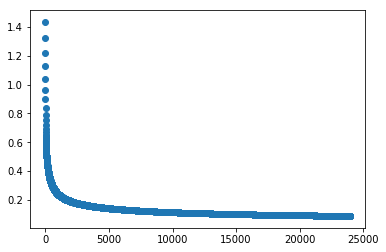

In [52]:
plt.scatter(iterations,neg_log_like_loss)

In [53]:
theta0_final

array([[-10.21489651]])

In [54]:
theta_final

array([[ 0.78814642],
       [ 2.47913708],
       [-0.18882753],
       [ 3.43391755],
       [-0.94361183],
       [ 0.61647532],
       [ 2.17558752],
       [ 5.6493838 ],
       [-2.63379352],
       [-5.03065603],
       [ 3.31476214],
       [ 1.31755469],
       [ 3.20529582],
       [ 3.26264828],
       [ 0.74608976],
       [-3.6618823 ],
       [-2.84360424],
       [ 0.50826071],
       [-1.5876813 ],
       [-1.68059736],
       [ 0.5131334 ],
       [ 5.67741691],
       [ 2.70269025],
       [ 6.5011679 ],
       [ 0.98357644],
       [ 2.60937696],
       [ 3.2107149 ],
       [ 6.43986039],
       [ 1.9644722 ],
       [-1.42582572]])

In [55]:
#How will you perform testing in Logistic Regression